
# **Metastasis Localization**
1.   Bone Classification (Yes/No)
2.   Lung Classification (Yes/No)
3.   Liver Classification (Yes/No)
4.   Brain Classification (Yes/No)


## **Steps**

1.   Data Exploring
*  1.1 Load Data
*  1.2 Data selection from general merged data
---
2.   Data Balancing
*  2.1  Balancing 
*  2.2 Extracting subset from data to make validation

---
3.   Feature Engineering
* 3.1 Prepare features and target variable
* 3.2 One-hot encoding
* 3.3 Train-Test Split


---

4.   Model Training and Evaluation
* 4.1 Model Training
* 4.2 Model Evaluation
* 4.3 Calculate the probability






# **Import Required Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,roc_auc_score, roc_curve, auc
from sklearn import preprocessing
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf

c:\Users\nadat\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# **1. Data Exploring**
## **1.1 Load Data**



In [3]:
seer_data = pd.read_csv('Final_general_merged.csv')
seer_data.head()

C:\Users\nadat\AppData\Local\Temp\ipykernel_16148\344564966.py:1: DtypeWarning: Columns (0,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  seer_data = pd.read_csv('Final_general_merged.csv')


,Menopausal Status,Tumor Size,Lymph Node Status,Tumor Grade,Mol Subtype,Histological Type,ER,PR,HER2,Chemotherapy,...,Overall Survival Status (Month),Recurrence Free Status (Month),Recurrence Free Status,Age,Surgery,Recurrence_Type,Bone_metastasis,Brain_metastasis,Lung_metastasis,Liver_metastasis
0,Post,T2,N3,III,Luminal A,Infiltrating duct carcinoma,Positive,Negative,Negative,No,...,140.500000,138.65,Not Recurrence,75-79 years,NaN,NaN,NaN,NaN,NaN,NaN
1,Pre,T1,N0,III,Luminal A,Infiltrating duct carcinoma,Positive,Positive,Negative,No,...,84.633333,83.52,Not Recurrence,40-44 years,NaN,NaN,NaN,NaN,NaN,NaN
2,Pre,T1,N1,II,Luminal B,Infiltrating duct carcinoma,Positive,Positive,Negative,Yes,...,163.700000,151.28,Recurrence,45-49 years,NaN,NaN,NaN,NaN,NaN,NaN
3,Pre,T2,N1,II,Luminal B,Infiltrating duct and lobular carcinoma,Positive,Positive,Negative,Yes,...,164.933333,162.76,Not Recurrence,45-49 years,NaN,NaN,NaN,NaN,NaN,NaN
4,Post,T2,N2,III,Luminal B,Infiltrating duct and lobular carcinoma,Positive,Positive,Negative,Yes,...,41.366667,18.55,Recurrence,75-79 years,NaN,NaN,NaN,NaN,NaN,NaN


# **1.2. Data selection from general merged data**

In [4]:
seer_data.columns

Index(['Menopausal Status', 'Tumor Size', 'Lymph Node Status', 'Tumor Grade',
       'Mol Subtype', 'Histological Type', 'ER', 'PR', 'HER2', 'Chemotherapy',
       'Radiotherapy', 'Type of Surgery', 'Tumor Location',
       'Overall Survival Status (Month)', 'Recurrence Free Status (Month)',
       'Recurrence Free Status', 'Age', 'Surgery', 'Recurrence_Type',
       'Bone_metastasis', 'Brain_metastasis', 'Lung_metastasis',
       'Liver_metastasis'],
      dtype='object')

In [5]:
selected_data = seer_data[['Age','Tumor Location', 'Overall Survival Status (Month)',
                               'Tumor Grade', 'Tumor Size','Lymph Node Status', 'Surgery',
                                'Chemotherapy', 'Radiotherapy', 'Mol Subtype', 'ER','PR','HER2','Histological Type','Bone_metastasis', 'Brain_metastasis', 'Lung_metastasis','Liver_metastasis']]

In [6]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190788 entries, 0 to 190787
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Age                              190146 non-null  object 
 1   Tumor Location                   190788 non-null  object 
 2   Overall Survival Status (Month)  190788 non-null  float64
 3   Tumor Grade                      190788 non-null  object 
 4   Tumor Size                       190788 non-null  object 
 5   Lymph Node Status                190788 non-null  object 
 6   Surgery                          186761 non-null  object 
 7   Chemotherapy                     189224 non-null  object 
 8   Radiotherapy                     189224 non-null  object 
 9   Mol Subtype                      190788 non-null  object 
 10  ER                               190788 non-null  object 
 11  PR                               190788 non-null  object 
 12  HE

In [7]:
selected_data.isna().sum()

Age                                 642
Tumor Location                        0
Overall Survival Status (Month)       0
Tumor Grade                           0
Tumor Size                            0
Lymph Node Status                     0
Surgery                            4027
Chemotherapy                       1564
Radiotherapy                       1564
Mol Subtype                           0
ER                                    0
PR                                    0
HER2                                  0
Histological Type                     0
Bone_metastasis                    3105
Brain_metastasis                   3105
Lung_metastasis                    3105
Liver_metastasis                   3105
dtype: int64

In [8]:
selected_data = selected_data.dropna()

In [9]:
selected_data.isna().sum()

Age                                0
Tumor Location                     0
Overall Survival Status (Month)    0
Tumor Grade                        0
Tumor Size                         0
Lymph Node Status                  0
Surgery                            0
Chemotherapy                       0
Radiotherapy                       0
Mol Subtype                        0
ER                                 0
PR                                 0
HER2                               0
Histological Type                  0
Bone_metastasis                    0
Brain_metastasis                   0
Lung_metastasis                    0
Liver_metastasis                   0
dtype: int64

In [10]:
selected_data.shape

(186119, 18)

In [98]:
selected_data['Histological Type'].value_counts()

Histological Type
Infiltrating duct carcinoma                147085
Infiltrating duct and lobular carcinoma     17199
Lobular carcinoma                           16445
Mucinous adenocarcinoma                      4168
Metaplastic carcinoma                         820
Cribriform carcinoma                          402
Name: count, dtype: int64

## **2. Data Balancing**


### **2.1. Locations Balancing**

In [11]:
selected_data['Bone_metastasis'].value_counts()

Bone_metastasis
No     179845
Yes      6274
Name: count, dtype: int64

In [12]:
selected_data['Liver_metastasis'].value_counts()

Liver_metastasis
No     183692
Yes      2427
Name: count, dtype: int64

In [13]:
selected_data['Lung_metastasis'].value_counts()

Lung_metastasis
No     183271
Yes      2848
Name: count, dtype: int64

In [14]:
selected_data['Brain_metastasis'].value_counts()

Brain_metastasis
No     185493
Yes       626
Name: count, dtype: int64

In [15]:
def balance_dataset(data, target_column, target_value, sample_size):
    # Filter data based on target value
    target_data = data[data[target_column] == target_value].dropna(subset=[target_column])

    # Sample from the remaining data
    remaining_data = data[data[target_column] != target_value].dropna(subset=[target_column])
    random_sample = remaining_data.sample(n=sample_size, random_state=42)

    # Concatenate the sampled data with the target data
    balanced_data = pd.concat([random_sample, target_data], axis=0)

    return balanced_data

bone_balanced_seer = balance_dataset(selected_data, 'Bone_metastasis', 'Yes', 6700)
lung_balanced_seer = balance_dataset(selected_data, 'Lung_metastasis', 'Yes', 3000)
liver_balanced_seer = balance_dataset(selected_data, 'Liver_metastasis', 'Yes', 2600)
brain_balanced_seer = balance_dataset(selected_data, 'Brain_metastasis', 'Yes', 650)

Function for visualizing

In [16]:
def visualize_balance(data_before, data_after, target_column):
    categories = sorted(set(data_before[target_column].unique()) | set(data_after[target_column].unique()))
    num_categories = len(categories)
    width = 0.35  # Width of each bar

    fig, ax = plt.subplots(figsize=(10, 6))
    # Before balancing
    before_counts = data_before[target_column].value_counts().reindex(categories, fill_value=0)
    before_indices = np.arange(num_categories)
    ax.bar(before_indices - width/2, before_counts, width, label='Before Balancing', color='skyblue')

    # After balancing
    after_counts = data_after[target_column].value_counts().reindex(categories, fill_value=0)
    after_indices = np.arange(num_categories)
    ax.bar(after_indices + width/2, after_counts, width, label='After Balancing', color='salmon')
    ax.set_ylim(0, 50000)  # Set y-axis range from 0 to 100

    ax.set_xlabel(target_column)
    ax.set_ylabel('Count')
    ax.set_title('Before and After Balancing')
    ax.set_xticks(before_indices)
    ax.set_xticklabels(categories)
    ax.legend()
    plt.show()

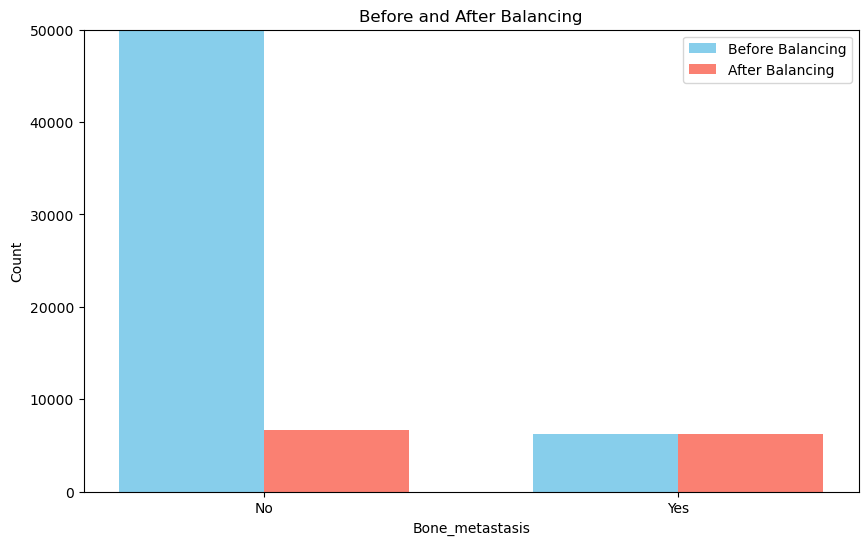

In [17]:
# Visualize balance for Bone metastasis
visualize_balance(selected_data, bone_balanced_seer, 'Bone_metastasis')

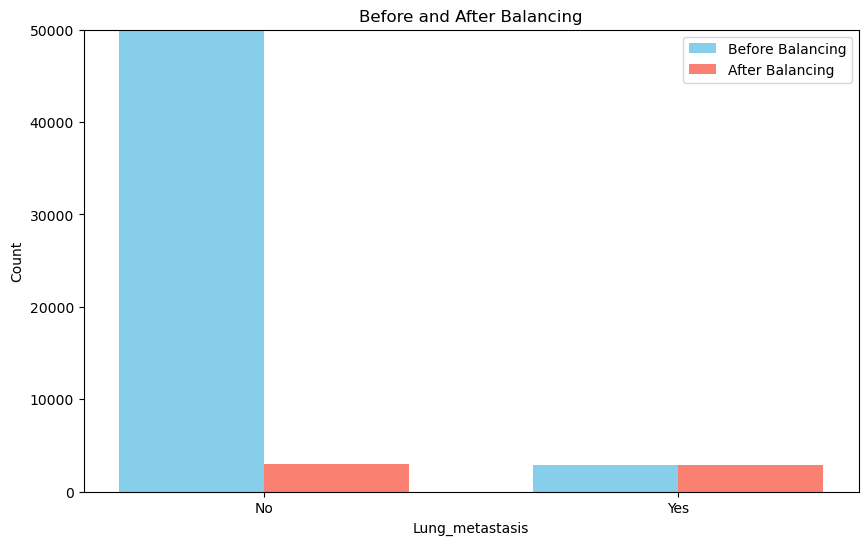

In [18]:
visualize_balance(selected_data, lung_balanced_seer, 'Lung_metastasis')

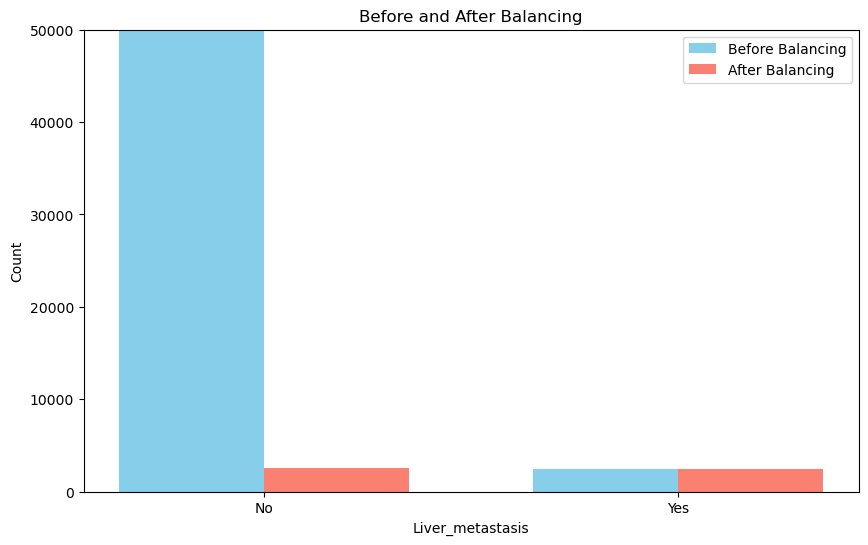

In [19]:
visualize_balance(selected_data, liver_balanced_seer, 'Liver_metastasis')

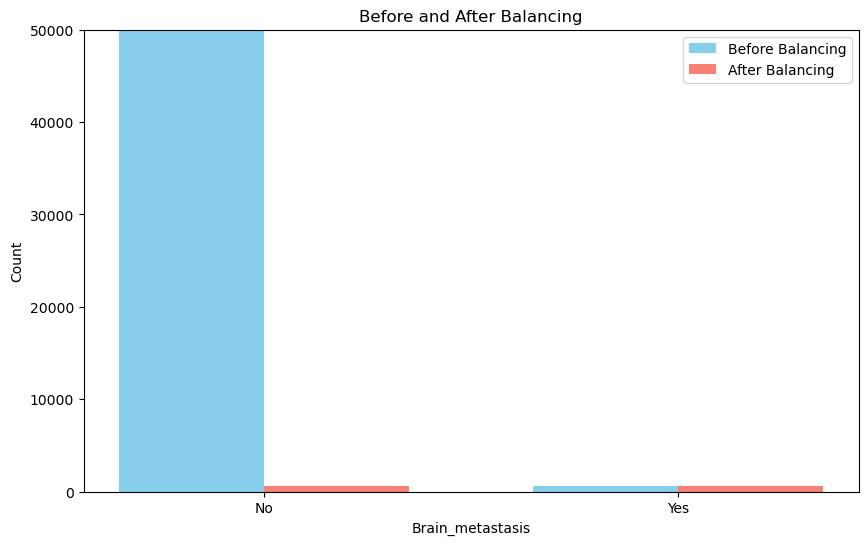

In [20]:
visualize_balance(selected_data, brain_balanced_seer, 'Brain_metastasis')





---



# **2.2. Extracting subset from data to make validation**

In [21]:
validation_bone = bone_balanced_seer.sample(frac=0.3, random_state=42)
bone_balanced_seer = bone_balanced_seer.drop(validation_bone.index)

validation_liver = liver_balanced_seer.sample(frac=0.3, random_state=42)
liver_balanced_seer = liver_balanced_seer.drop(validation_liver.index)

validation_lung = lung_balanced_seer.sample(frac=0.3, random_state=42)
lung_balanced_seer = lung_balanced_seer.drop(validation_lung.index)

validation_brain = brain_balanced_seer.sample(frac=0.3, random_state=42)
brain_balanced_seer = brain_balanced_seer.drop(validation_brain.index)

## **3. Feature Engineering**




## **3.1. Prepare features and target variable**

In [22]:
X_bone = bone_balanced_seer.drop(columns=['Brain_metastasis', 'Lung_metastasis', 'Liver_metastasis', 'Bone_metastasis'],axis=1)
y_bone = bone_balanced_seer['Bone_metastasis']

In [23]:
X_lung = lung_balanced_seer.drop(columns=['Brain_metastasis', 'Lung_metastasis', 'Liver_metastasis', 'Bone_metastasis'],axis=1)
y_lung = lung_balanced_seer['Lung_metastasis']

In [24]:
X_liver = liver_balanced_seer.drop(columns=['Brain_metastasis', 'Lung_metastasis', 'Liver_metastasis', 'Bone_metastasis'],axis=1)
y_liver = liver_balanced_seer['Liver_metastasis']

In [25]:
X_brain = brain_balanced_seer.drop(columns=['Brain_metastasis', 'Lung_metastasis', 'Liver_metastasis', 'Bone_metastasis'],axis=1)
y_brain = brain_balanced_seer['Brain_metastasis']

## **3.2 Encoding**

### **Features**

In [26]:
def one_hot_encode_columns(features, columns):
    return pd.get_dummies(features, columns=columns)

columns_to_encode = ['Age','Tumor Location',
                               'Tumor Grade', 'Tumor Size','Lymph Node Status', 'Surgery',
                                'Chemotherapy', 'Radiotherapy', 'Mol Subtype', 'ER','PR','HER2','Histological Type']
                     
X_bone = one_hot_encode_columns(X_bone, columns_to_encode)
X_lung = one_hot_encode_columns(X_lung, columns_to_encode)
X_liver = one_hot_encode_columns(X_liver, columns_to_encode)
X_brain = one_hot_encode_columns(X_brain, columns_to_encode)

### **Target**

In [27]:
label_encoder_bone = preprocessing.LabelEncoder()
label_encoder_liver = preprocessing.LabelEncoder()
label_encoder_lung = preprocessing.LabelEncoder()
label_encoder_brain = preprocessing.LabelEncoder()

y_bone = label_encoder_bone.fit_transform(y_bone)
y_lung = label_encoder_liver.fit_transform(y_lung)
y_liver = label_encoder_lung.fit_transform(y_liver)
y_brain = label_encoder_brain.fit_transform(y_brain)

## **3.3 Train-Test Split**

In [28]:
def perform_train_test_split(X, y, test_size=0.3, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    return X_train, X_test, y_train, y_test

X_bone_train, X_bone_test, y_bone_train, y_bone_test = perform_train_test_split(X_bone, y_bone)
X_lung_train, X_lung_test, y_lung_train, y_lung_test = perform_train_test_split(X_lung, y_lung)
X_liver_train, X_liver_test, y_liver_train, y_liver_test = perform_train_test_split(X_liver, y_liver)
X_brain_train, X_brain_test, y_brain_train, y_brain_test = perform_train_test_split(X_brain, y_brain)

# **3.4 Scaling for Survival months**

In [29]:
from sklearn.preprocessing import StandardScaler

# Scale survival months for 'bone' location
scaler_bone = StandardScaler()
scaler_bone.fit(X_bone_train[['Overall Survival Status (Month)']])
X_bone_train_scaled = X_bone_train.copy()
X_bone_train_scaled['Overall Survival Status (Month)'] = scaler_bone.transform(X_bone_train_scaled[['Overall Survival Status (Month)']])
X_bone_test_scaled = X_bone_test.copy()
X_bone_test_scaled['Overall Survival Status (Month)'] = scaler_bone.transform(X_bone_test_scaled[['Overall Survival Status (Month)']])

# Scale survival months for 'lung' location
scaler_lung = StandardScaler()
scaler_lung.fit(X_lung_train[['Overall Survival Status (Month)']])
X_lung_train_scaled = X_lung_train.copy()
X_lung_train_scaled['Overall Survival Status (Month)'] = scaler_lung.transform(X_lung_train_scaled[['Overall Survival Status (Month)']])
X_lung_test_scaled = X_lung_test.copy()
X_lung_test_scaled['Overall Survival Status (Month)'] = scaler_lung.transform(X_lung_test_scaled[['Overall Survival Status (Month)']])

# Scale survival months for 'liver' location
scaler_liver = StandardScaler()
scaler_liver.fit(X_liver_train[['Overall Survival Status (Month)']])
X_liver_train_scaled = X_liver_train.copy()
X_liver_train_scaled['Overall Survival Status (Month)'] = scaler_liver.transform(X_liver_train_scaled[['Overall Survival Status (Month)']])
X_liver_test_scaled = X_liver_test.copy()
X_liver_test_scaled['Overall Survival Status (Month)'] = scaler_liver.transform(X_liver_test_scaled[['Overall Survival Status (Month)']])

# Scale survival months for 'brain' location
scaler_brain = StandardScaler()
scaler_brain.fit(X_brain_train[['Overall Survival Status (Month)']])
X_brain_train_scaled = X_brain_train.copy()
X_brain_train_scaled['Overall Survival Status (Month)'] = scaler_brain.transform(X_brain_train_scaled[['Overall Survival Status (Month)']])
X_brain_test_scaled = X_brain_test.copy()
X_brain_test_scaled['Overall Survival Status (Month)'] = scaler_brain.transform(X_brain_test_scaled[['Overall Survival Status (Month)']])


## **4. Model Training & Evaluation**




### **Training Function**

In [30]:
import joblib

def train_model_save(model, X_train, y_train, save_path):
    # Train the model
    model.fit(X_train, y_train)

    # Save the model weights
    joblib.dump(model, save_path)

### **Evaluation Function**

In [31]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    print("Train Accuracy:", train_acc)

    y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    test_report = classification_report(y_test, y_pred)
    print("\nTest Accuracy:", test_acc)
    print("Test Classification Report:")
    print(test_report)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate ROC-AUC
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class
    roc_auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

### **Models**

# **1. XGBoost**

In [32]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import joblib

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300, 500, 700, 1000],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [10, 1, 0.1, 0.01, 0.001]
}

def train_and_save_model_XGB(X_train_scaled, y_train, save_path):
    # Initialize XGBoost classifier
    model = xgb.XGBClassifier()
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
    grid_result = grid_search.fit(X_train_scaled, y_train)
    
    # Get the best model
    best_model = grid_result.best_estimator_
    
    # Train the best model
    best_model.fit(X_train_scaled, y_train)
    
    # Save the best model as .pkl file
    joblib.dump(best_model, save_path)
    
# Train and save models for each location
train_and_save_model_XGB(X_bone_train_scaled, y_bone_train, 'model_bone_XG.pkl')
train_and_save_model_XGB(X_lung_train_scaled, y_lung_train, 'model_lung_XG.pkl')
train_and_save_model_XGB(X_liver_train_scaled, y_liver_train, 'model_liver_XG.pkl')
train_and_save_model_XGB(X_brain_train_scaled, y_brain_train, 'model_brain_XG.pkl')

In [33]:
loaded_model_bone = joblib.load('model_bone_XG.pkl')
loaded_model_lung = joblib.load('model_lung_XG.pkl')
loaded_model_liver = joblib.load('model_liver_XG.pkl')
loaded_model_brain = joblib.load('model_brain_XG.pkl')


bone XGBoost:
Train Accuracy: 0.950920245398773

Test Accuracy: 0.9508256880733945
Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1405
           1       0.95      0.94      0.95      1320

    accuracy                           0.95      2725
   macro avg       0.95      0.95      0.95      2725
weighted avg       0.95      0.95      0.95      2725



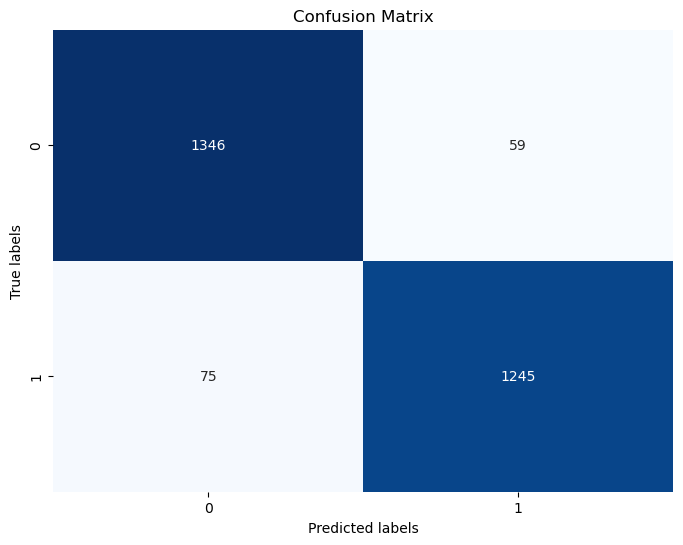

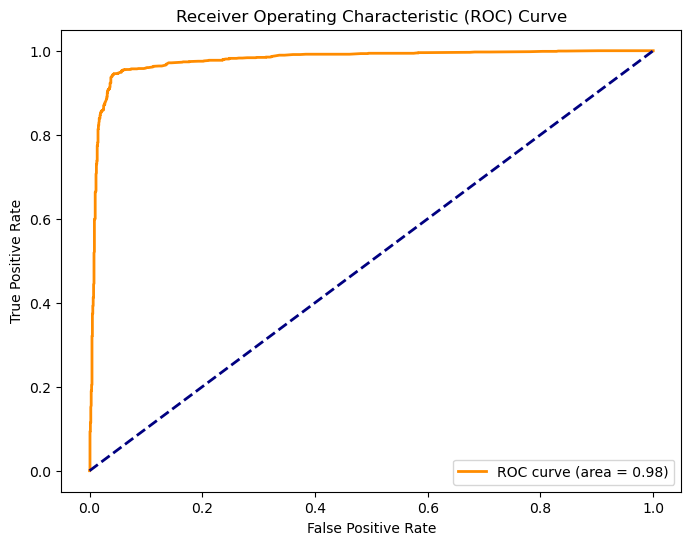

In [34]:
print("\nbone XGBoost:")
evaluate_model(loaded_model_bone, X_bone_train_scaled, y_bone_train, X_bone_test_scaled, y_bone_test)


lung XGBoost:
Train Accuracy: 0.9452006980802792

Test Accuracy: 0.9397884458909682
Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       622
           1       0.93      0.95      0.94       607

    accuracy                           0.94      1229
   macro avg       0.94      0.94      0.94      1229
weighted avg       0.94      0.94      0.94      1229



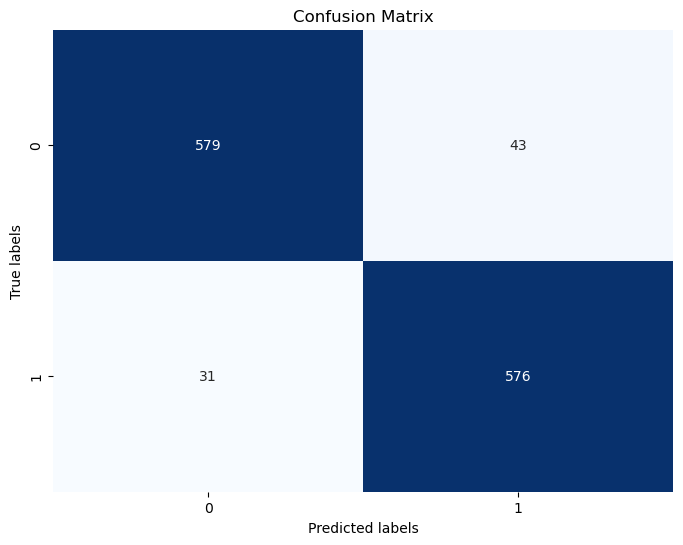

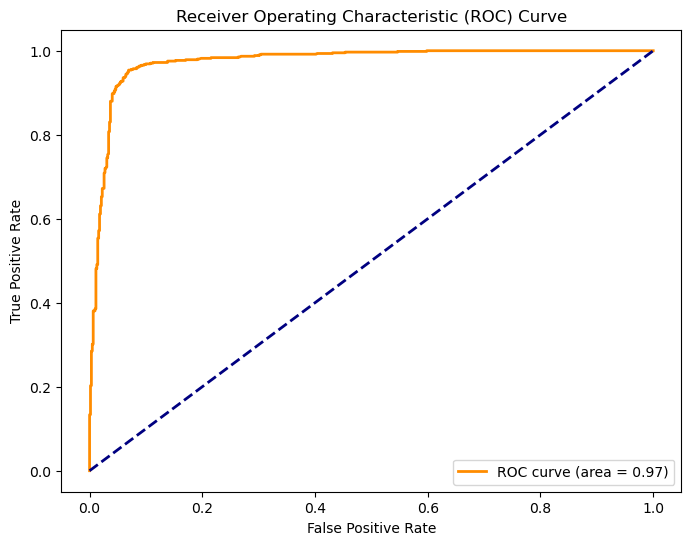

In [35]:
print("\nlung XGBoost:")
evaluate_model(loaded_model_lung, X_lung_train_scaled, y_lung_train, X_lung_test_scaled, y_lung_test)


liver XGBoost:
Train Accuracy: 0.9650832318311002

Test Accuracy: 0.9375
Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       542
           1       0.93      0.95      0.94       514

    accuracy                           0.94      1056
   macro avg       0.94      0.94      0.94      1056
weighted avg       0.94      0.94      0.94      1056



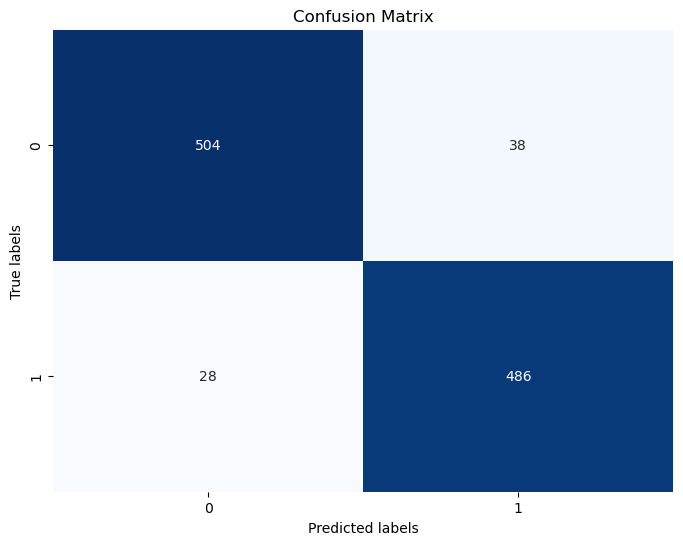

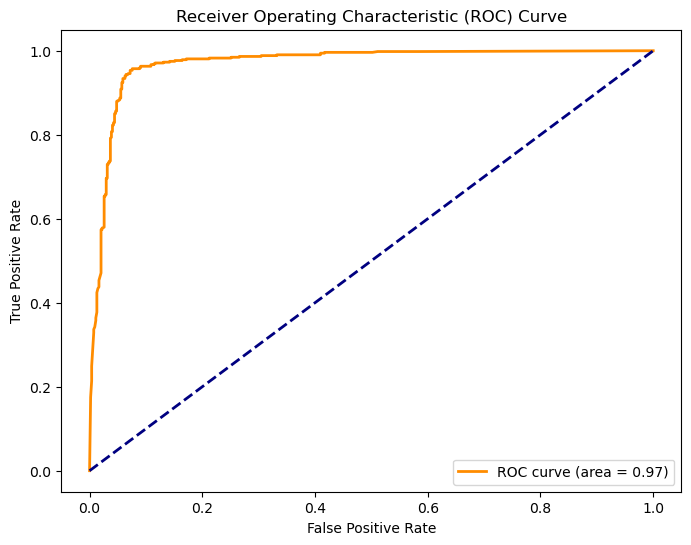

In [36]:
print("\nliver XGBoost:")
evaluate_model(loaded_model_liver, X_liver_train_scaled, y_liver_train,  X_liver_test_scaled, y_liver_test)


brain XGBoost:
Train Accuracy: 0.9472

Test Accuracy: 0.8992537313432836
Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       134
           1       0.89      0.91      0.90       134

    accuracy                           0.90       268
   macro avg       0.90      0.90      0.90       268
weighted avg       0.90      0.90      0.90       268



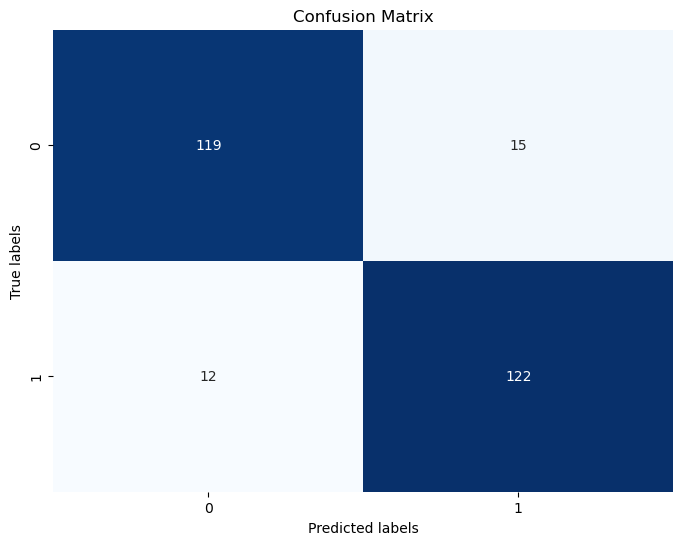

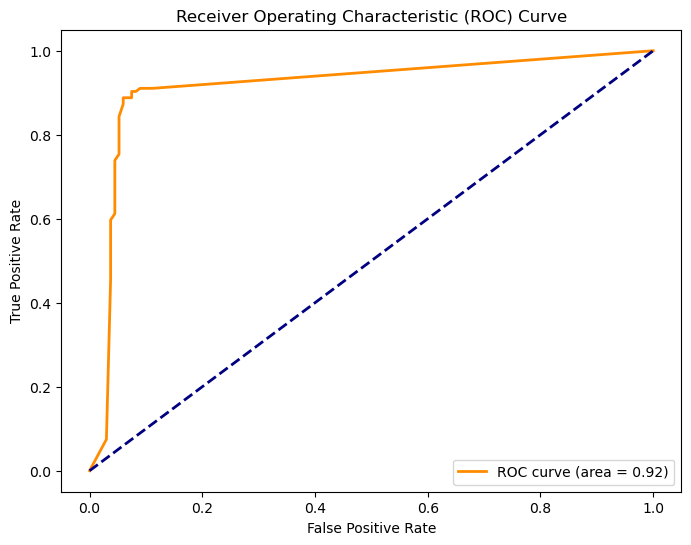

In [37]:
print("\nbrain XGBoost:")
evaluate_model(loaded_model_brain, X_brain_train_scaled, y_brain_train, X_brain_test_scaled, y_brain_test)

# **2. Random Forest**

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import joblib

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10]
}

def train_and_save_model_RF(X_train_scaled, y_train, save_path):
    # Initialize Random Forest classifier
    model = RandomForestClassifier()
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
    grid_result = grid_search.fit(X_train_scaled, y_train)
    
    # Get the best model
    best_model = grid_result.best_estimator_
    
    # Train the best model
    best_model.fit(X_train_scaled, y_train)
    
    # Save the best model as .pkl file
    joblib.dump(best_model, save_path)

# Train and save models for each location
train_and_save_model_RF(X_bone_train_scaled, y_bone_train, 'model_bone_rf.pkl')
train_and_save_model_RF(X_lung_train_scaled, y_lung_train, 'model_lung_rf.pkl')
train_and_save_model_RF(X_liver_train_scaled, y_liver_train, 'model_liver_rf.pkl')
train_and_save_model_RF(X_brain_train_scaled, y_brain_train, 'model_brain_rf.pkl')

In [39]:
loaded_model_bone_rf = joblib.load('model_bone_rf.pkl')
loaded_model_lung_rf = joblib.load('model_lung_rf.pkl')
loaded_model_liver_rf = joblib.load('model_liver_rf.pkl')
loaded_model_brain_rf = joblib.load('model_brain_rf.pkl')


bone RF:
Train Accuracy: 0.9507629384929999

Test Accuracy: 0.9508256880733945
Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1405
           1       0.95      0.94      0.95      1320

    accuracy                           0.95      2725
   macro avg       0.95      0.95      0.95      2725
weighted avg       0.95      0.95      0.95      2725



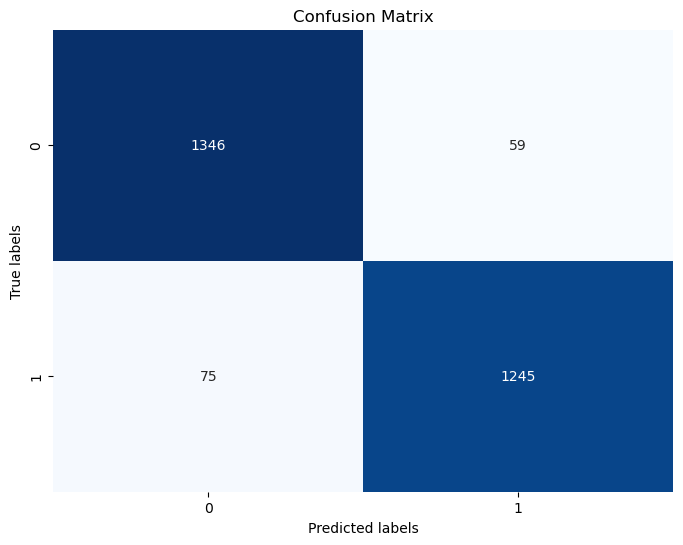

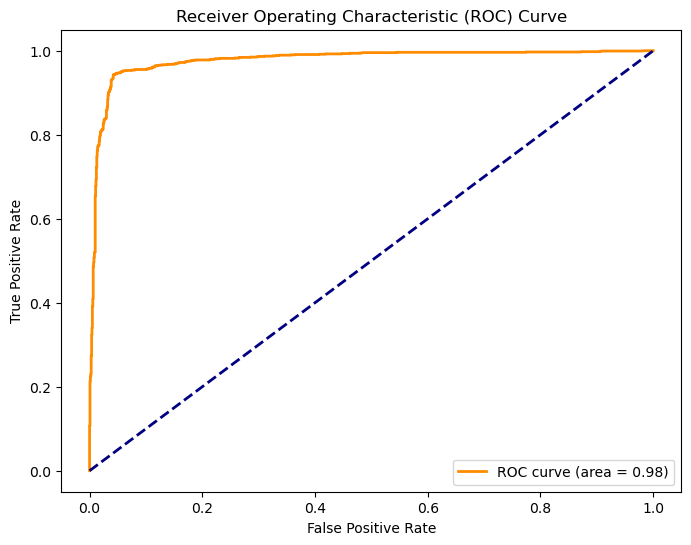

In [40]:
print("\nbone RF:")
evaluate_model(loaded_model_bone_rf, X_bone_train_scaled, y_bone_train, X_bone_test_scaled, y_bone_test)


lung RF:
Train Accuracy: 0.9595113438045375

Test Accuracy: 0.9397884458909682
Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       622
           1       0.93      0.95      0.94       607

    accuracy                           0.94      1229
   macro avg       0.94      0.94      0.94      1229
weighted avg       0.94      0.94      0.94      1229



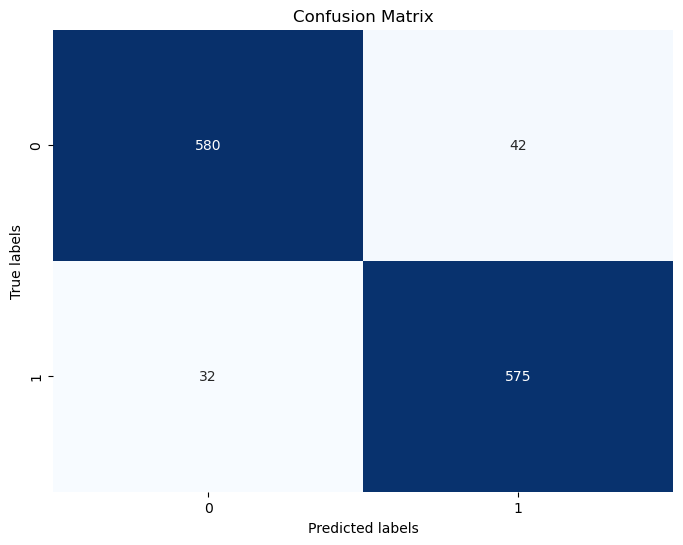

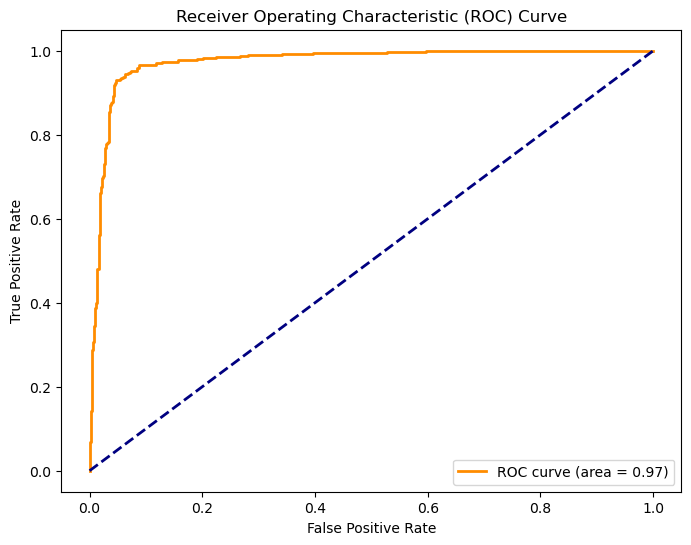

In [41]:
print("\nlung RF:")
evaluate_model(loaded_model_lung_rf, X_lung_train_scaled, y_lung_train, X_lung_test_scaled, y_lung_test)


liver RF:
Train Accuracy: 0.9687373122208689

Test Accuracy: 0.9422348484848485
Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       542
           1       0.93      0.95      0.94       514

    accuracy                           0.94      1056
   macro avg       0.94      0.94      0.94      1056
weighted avg       0.94      0.94      0.94      1056



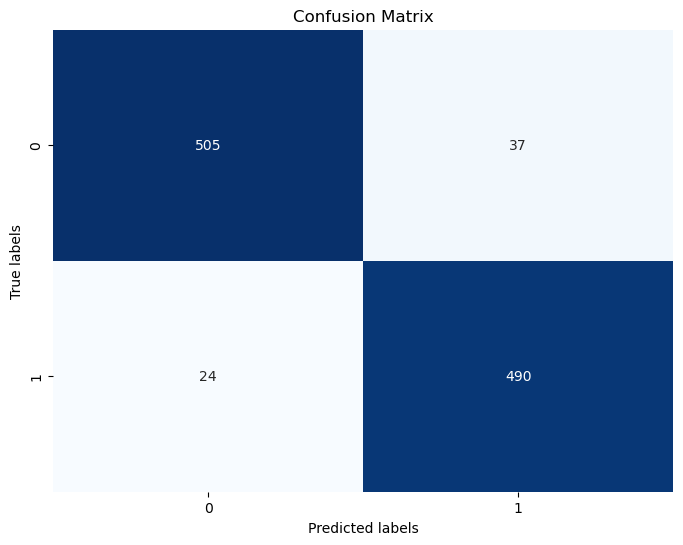

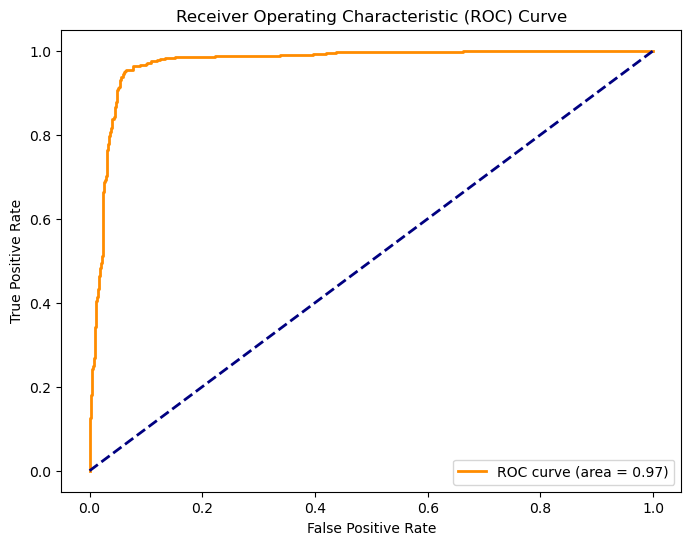

In [42]:
print("\nliver RF:")
evaluate_model(loaded_model_liver_rf, X_liver_train_scaled, y_liver_train,  X_liver_test_scaled, y_liver_test)


brain RF:
Train Accuracy: 0.9552

Test Accuracy: 0.917910447761194
Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       134
           1       0.91      0.93      0.92       134

    accuracy                           0.92       268
   macro avg       0.92      0.92      0.92       268
weighted avg       0.92      0.92      0.92       268



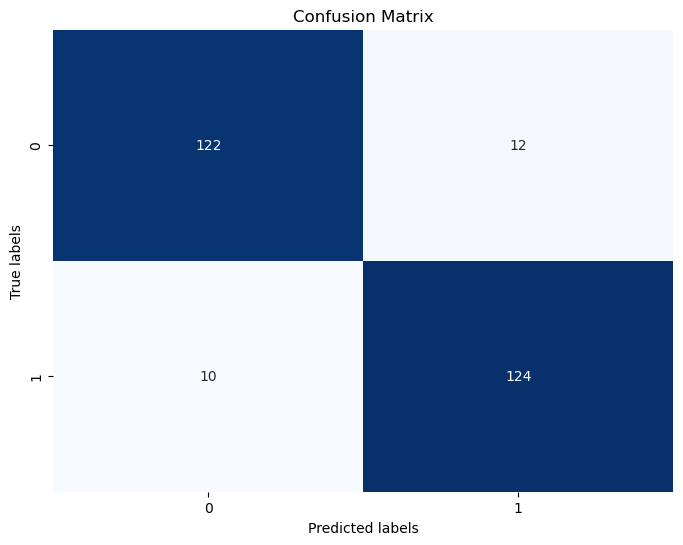

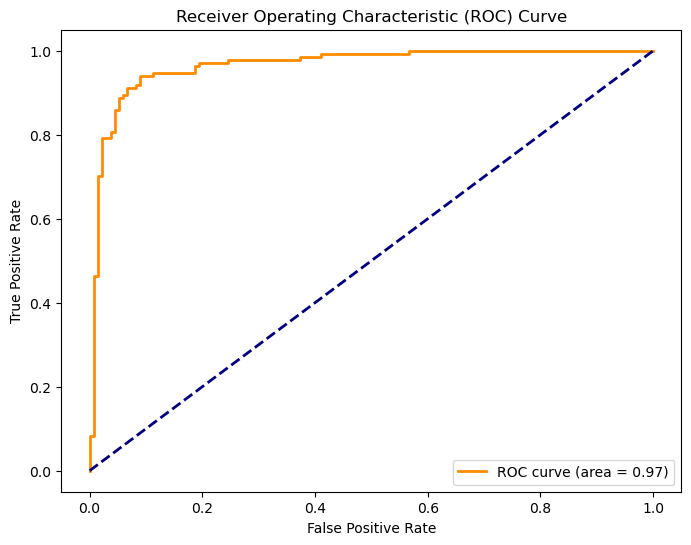

In [43]:
print("\nbrain RF:")
evaluate_model(loaded_model_brain_rf, X_brain_train_scaled, y_brain_train, X_brain_test_scaled, y_brain_test)

# **3. SVM**

In [74]:
from sklearn.svm import SVC
import joblib

def train_and_save_model_SVM(X_train_scaled, y_train, save_path):
    # Initialize Support Vector Machine (SVM) classifier with default parameters
    model = SVC(probability=True)
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Save the model as .pkl file
    joblib.dump(model, save_path)

# Train and save models for each location
train_and_save_model_SVM(X_bone_train_scaled, y_bone_train, 'model_bone_SV.pkl')
train_and_save_model_SVM(X_lung_train_scaled, y_lung_train, 'model_lung_SV.pkl')
train_and_save_model_SVM(X_liver_train_scaled, y_liver_train, 'model_liver_SV.pkl')
train_and_save_model_SVM(X_brain_train_scaled, y_brain_train, 'model_brain_SV.pkl')


In [75]:
loaded_model_bone_SV = joblib.load('model_bone_SV.pkl')
loaded_model_lung_SV = joblib.load('model_lung_SV.pkl')
loaded_model_liver_SV = joblib.load('model_liver_SV.pkl')
loaded_model_brain_SV = joblib.load('model_brain_SV.pkl')


bone SVM:
Train Accuracy: 0.950920245398773

Test Accuracy: 0.9508256880733945
Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1405
           1       0.95      0.94      0.95      1320

    accuracy                           0.95      2725
   macro avg       0.95      0.95      0.95      2725
weighted avg       0.95      0.95      0.95      2725



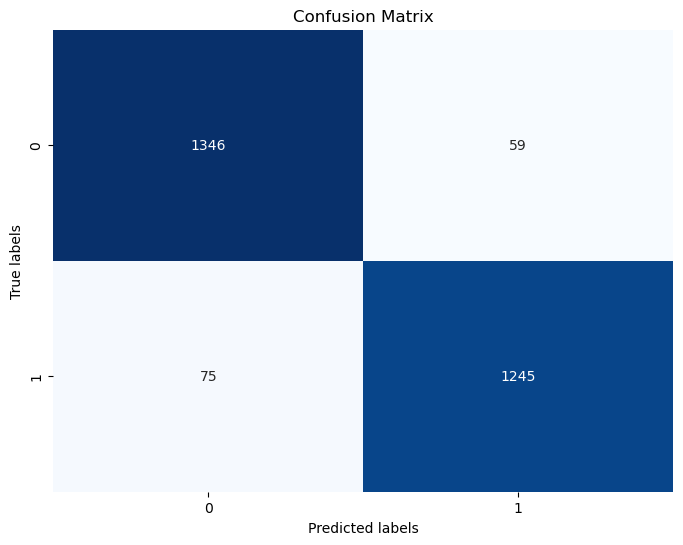

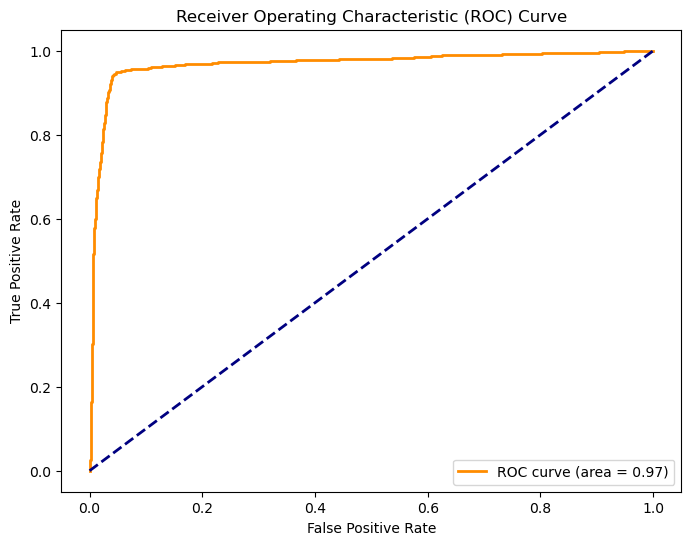

In [76]:
print("\nbone SVM:")
evaluate_model(loaded_model_bone_SV, X_bone_train_scaled, y_bone_train, X_bone_test_scaled, y_bone_test)


lung SVM:
Train Accuracy: 0.9385689354275741

Test Accuracy: 0.9308380797396257
Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       622
           1       0.93      0.93      0.93       607

    accuracy                           0.93      1229
   macro avg       0.93      0.93      0.93      1229
weighted avg       0.93      0.93      0.93      1229



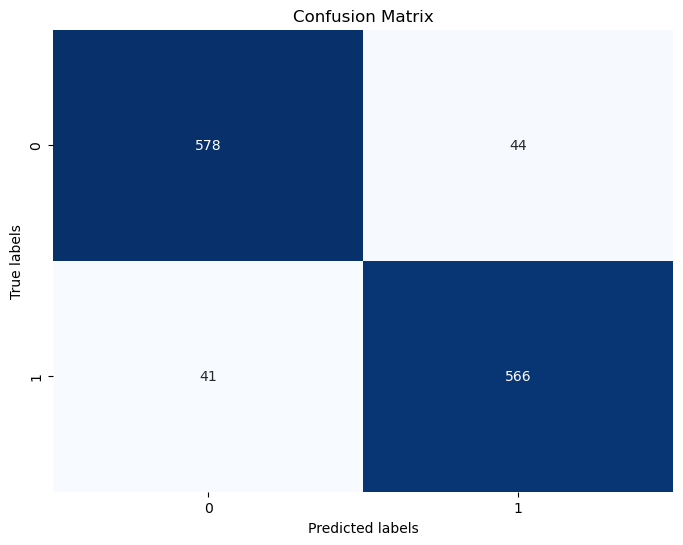

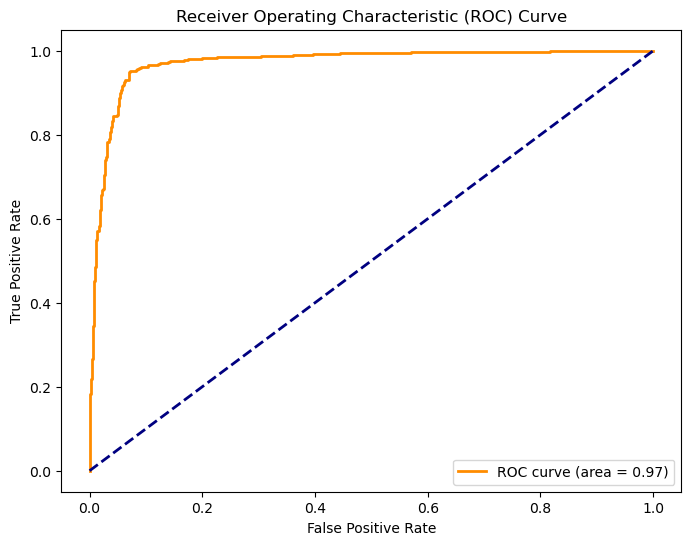

In [77]:
print("\nlung SVM:")
evaluate_model(loaded_model_lung_SV, X_lung_train_scaled, y_lung_train, X_lung_test_scaled, y_lung_test)


liver SVM:
Train Accuracy: 0.9488428745432399

Test Accuracy: 0.9384469696969697
Test Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       542
           1       0.92      0.95      0.94       514

    accuracy                           0.94      1056
   macro avg       0.94      0.94      0.94      1056
weighted avg       0.94      0.94      0.94      1056



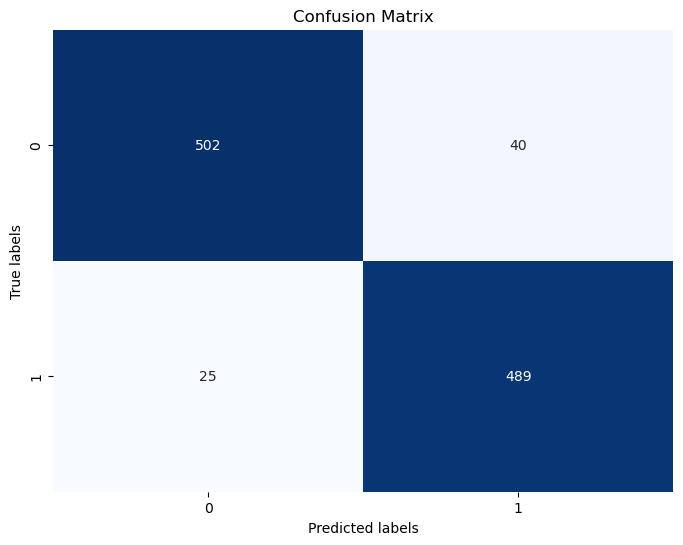

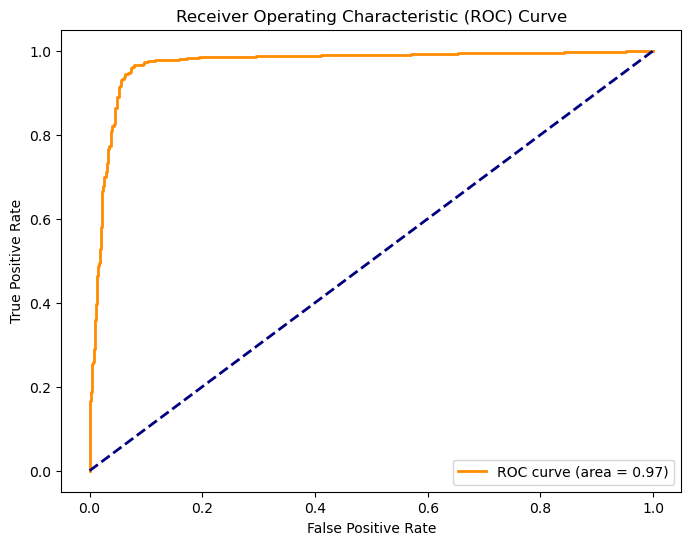

In [78]:
print("\nliver SVM:")
evaluate_model(loaded_model_liver_SV, X_liver_train_scaled, y_liver_train,  X_liver_test_scaled, y_liver_test)


brain SVM:
Train Accuracy: 0.9552

Test Accuracy: 0.914179104477612
Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       134
           1       0.92      0.91      0.91       134

    accuracy                           0.91       268
   macro avg       0.91      0.91      0.91       268
weighted avg       0.91      0.91      0.91       268



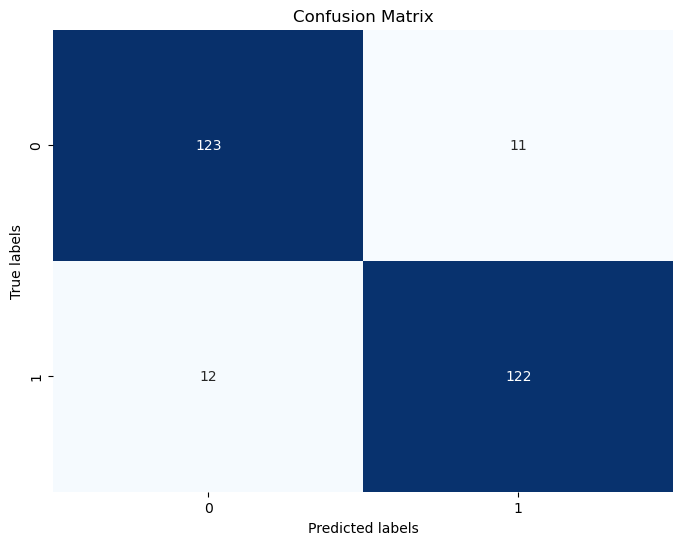

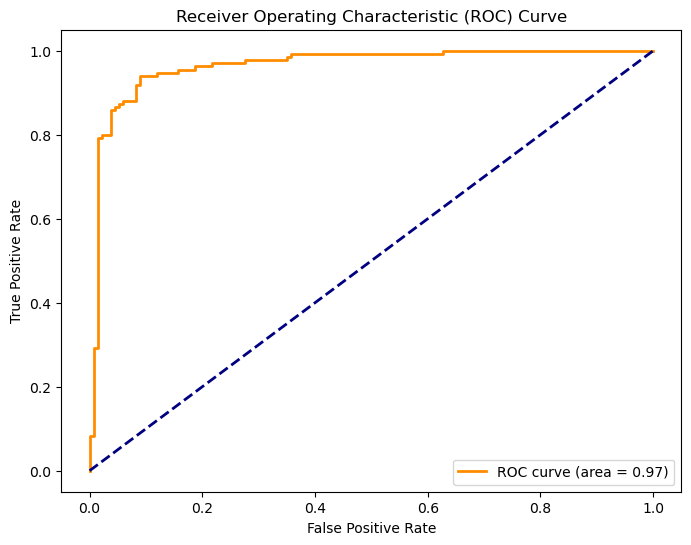

In [79]:
print("\nbrain SVM:")
evaluate_model(loaded_model_brain_SV, X_brain_train_scaled, y_brain_train, X_brain_test_scaled, y_brain_test)

# ______________________________________________________________
## Subset Validation

In [150]:
X_val_bone_seer = validation_bone.drop(columns=['Brain_metastasis', 'Lung_metastasis', 'Liver_metastasis', 'Bone_metastasis'],axis=1)
y_val_bone_seer = validation_bone['Bone_metastasis']

X_val_liver_seer = validation_liver.drop(columns=['Brain_metastasis', 'Lung_metastasis', 'Liver_metastasis', 'Bone_metastasis'],axis=1)
y_val_liver_seer = validation_liver['Liver_metastasis']

X_val_lung_seer = validation_lung.drop(columns=['Brain_metastasis', 'Lung_metastasis', 'Liver_metastasis', 'Bone_metastasis'],axis=1)
y_val_lung_seer = validation_lung['Lung_metastasis']

X_val_brain_seer = validation_brain.drop(columns=['Brain_metastasis', 'Lung_metastasis', 'Liver_metastasis', 'Bone_metastasis'],axis=1)
y_val_brain_seer = validation_brain['Brain_metastasis']

In [151]:
X_val_bone_seer = one_hot_encode_columns(X_val_bone_seer, columns_to_encode)
X_val_liver_seer = one_hot_encode_columns(X_val_liver_seer, columns_to_encode)
X_val_lung_seer = one_hot_encode_columns(X_val_lung_seer, columns_to_encode)
X_val_brain_seer = one_hot_encode_columns(X_val_brain_seer, columns_to_encode)

In [152]:
X_val_brain_seer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, 97235 to 112193
Data columns (total 45 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Overall Survival Status (Month)                            383 non-null    float64
 1   Age_30-34 years                                            383 non-null    bool   
 2   Age_35-39 years                                            383 non-null    bool   
 3   Age_40-44 years                                            383 non-null    bool   
 4   Age_45-49 years                                            383 non-null    bool   
 5   Age_50-54 years                                            383 non-null    bool   
 6   Age_55-59 years                                            383 non-null    bool   
 7   Age_60-64 years                                            383 non-null    bool   
 8   Age_65-6

In [153]:
# solve brain problem

size = X_val_brain_seer.columns.get_loc('Tumor Size_T1')
X_val_brain_seer.insert(size,'Tumor Size_T0', 0)

age = X_val_brain_seer.columns.get_loc('Age_30-34 years')
X_val_brain_seer.insert(age,'Age_25-29 years', 0)

histo = X_val_brain_seer.columns.get_loc('Histological Type_Infiltrating duct and lobular carcinoma')
X_val_brain_seer.insert(histo,'Histological Type_Cribriform carcinoma', 0)


In [154]:
X_val_brain_seer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, 97235 to 112193
Data columns (total 48 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Overall Survival Status (Month)                            383 non-null    float64
 1   Age_25-29 years                                            383 non-null    int64  
 2   Age_30-34 years                                            383 non-null    bool   
 3   Age_35-39 years                                            383 non-null    bool   
 4   Age_40-44 years                                            383 non-null    bool   
 5   Age_45-49 years                                            383 non-null    bool   
 6   Age_50-54 years                                            383 non-null    bool   
 7   Age_55-59 years                                            383 non-null    bool   
 8   Age_60-6

In [155]:
y_val_bone_seer = label_encoder_bone.transform(y_val_bone_seer)
y_val_liver_seer = label_encoder_liver.transform(y_val_liver_seer)
y_val_lung_seer = label_encoder_lung.transform(y_val_lung_seer)
y_val_brain_seer = label_encoder_brain.transform(y_val_brain_seer)

In [156]:
X_val_bone_scaled = X_val_bone_seer.copy()
X_val_bone_scaled['Overall Survival Status (Month)'] = scaler_bone.transform(X_val_bone_scaled[['Overall Survival Status (Month)']])

X_val_liver_scaled = X_val_liver_seer.copy()
X_val_liver_scaled['Overall Survival Status (Month)'] = scaler_liver.transform(X_val_liver_scaled[['Overall Survival Status (Month)']])

X_val_lung_scaled = X_val_lung_seer.copy()
X_val_lung_scaled['Overall Survival Status (Month)'] = scaler_lung.transform(X_val_lung_scaled[['Overall Survival Status (Month)']])

X_val_brain_scaled = X_val_brain_seer.copy()
X_val_brain_scaled['Overall Survival Status (Month)'] = scaler_brain.transform(X_val_brain_scaled[['Overall Survival Status (Month)']])

In [157]:
def validate_model(model, X_val, y_val):

    y_pred = model.predict(X_val)
    Val_acc = accuracy_score(y_val, y_pred)
    Val_report = classification_report(y_val, y_pred)
    print("\nVal Accuracy:", Val_acc)
    print("Val Classification Report:")
    print(Val_report)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate ROC-AUC
    y_prob = model.predict_proba(X_val)[:, 1]  # Probability estimates of the positive class
    roc_auc = roc_auc_score(y_val, y_prob)
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


Bone XGBoost:

Val Accuracy: 0.9455292908530318
Val Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2019
           1       0.95      0.93      0.94      1873

    accuracy                           0.95      3892
   macro avg       0.95      0.95      0.95      3892
weighted avg       0.95      0.95      0.95      3892



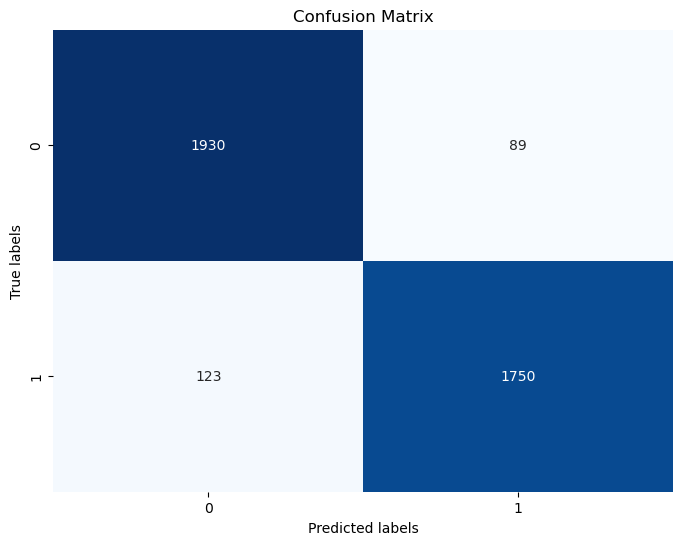

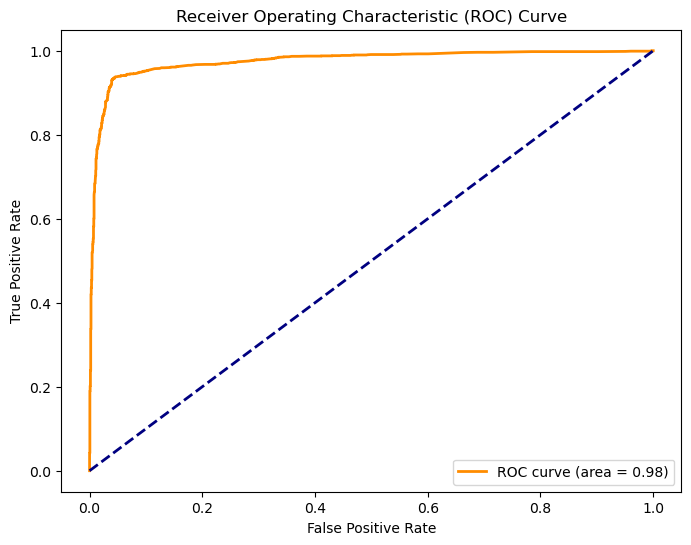

In [158]:
print("\nBone XGBoost:")
validate_model(loaded_model_bone, X_val_bone_scaled,y_val_bone_seer)


Liver XGBoost:

Val Accuracy: 0.946949602122016
Val Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       794
           1       0.95      0.93      0.94       714

    accuracy                           0.95      1508
   macro avg       0.95      0.95      0.95      1508
weighted avg       0.95      0.95      0.95      1508



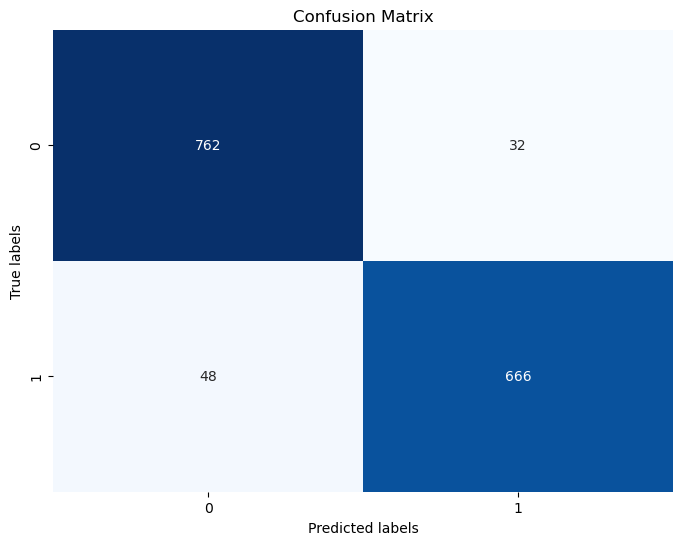

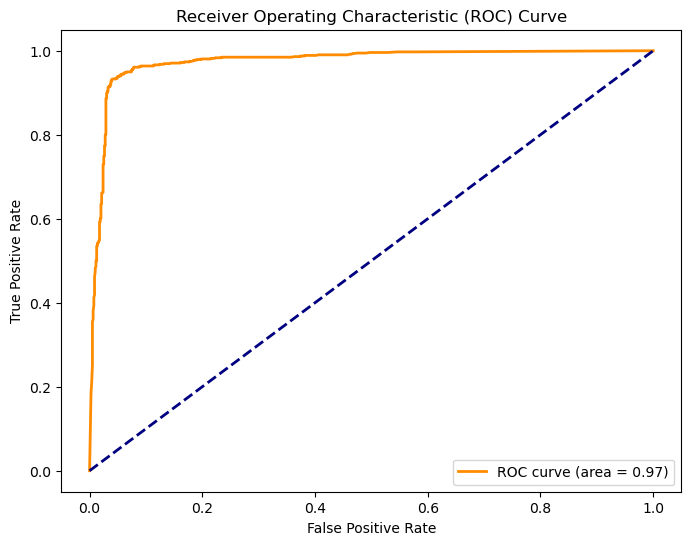

In [159]:
print("\nLiver XGBoost:")
validate_model(loaded_model_liver,X_val_liver_scaled ,y_val_liver_seer)


Lung XGBoost:

Val Accuracy: 0.9481185860889396
Val Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       928
           1       0.94      0.96      0.95       826

    accuracy                           0.95      1754
   macro avg       0.95      0.95      0.95      1754
weighted avg       0.95      0.95      0.95      1754



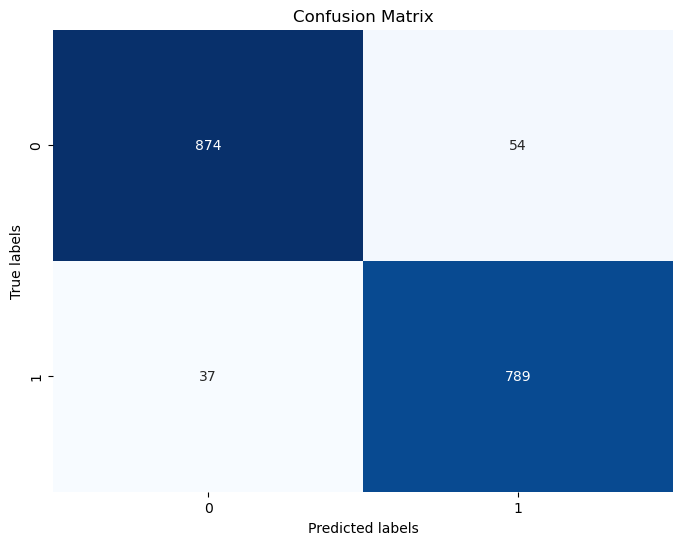

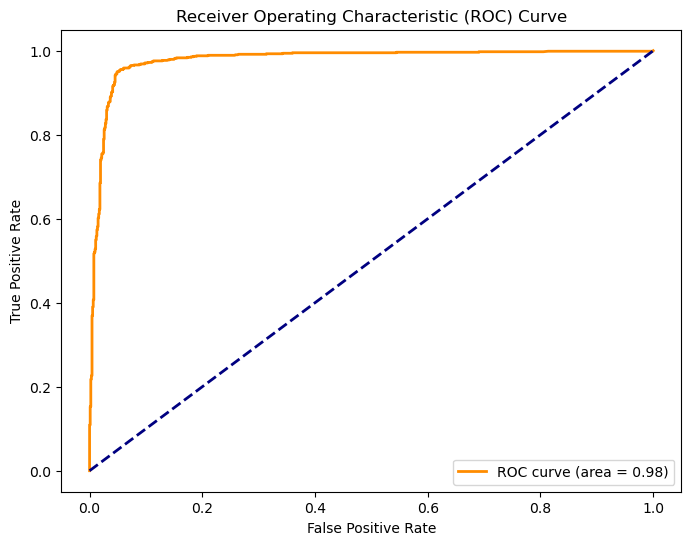

In [160]:
print("\nLung XGBoost:")
validate_model(loaded_model_lung,X_val_lung_scaled ,y_val_lung_seer)


Brain XGBoost:

Val Accuracy: 0.9268929503916449
Val Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       202
           1       0.90      0.96      0.93       181

    accuracy                           0.93       383
   macro avg       0.93      0.93      0.93       383
weighted avg       0.93      0.93      0.93       383



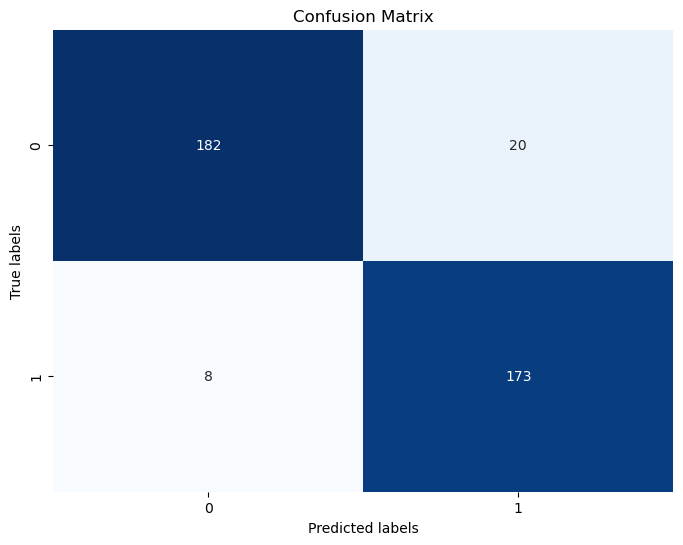

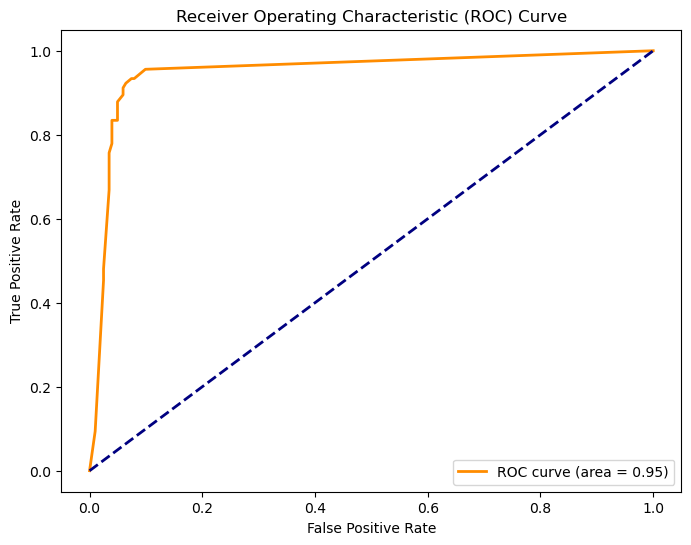

In [162]:
print("\nBrain XGBoost:")
validate_model(loaded_model_brain,X_val_brain_scaled ,y_val_brain_seer)

## RF


Bone RF:

Val Accuracy: 0.9455292908530318
Val Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2019
           1       0.95      0.93      0.94      1873

    accuracy                           0.95      3892
   macro avg       0.95      0.95      0.95      3892
weighted avg       0.95      0.95      0.95      3892



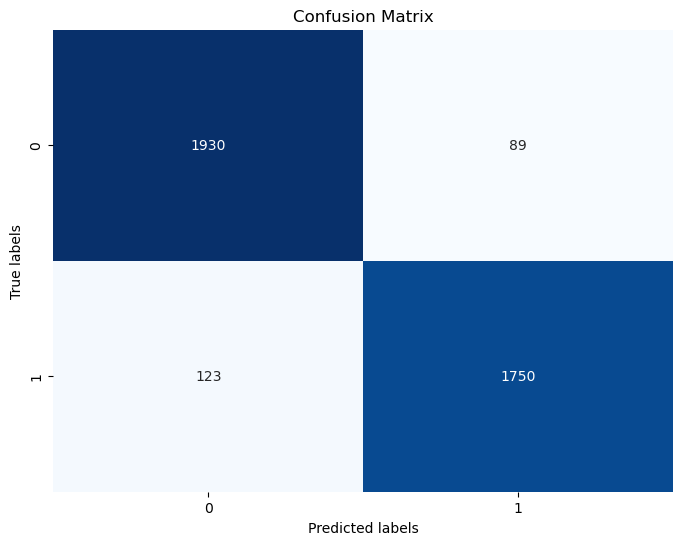

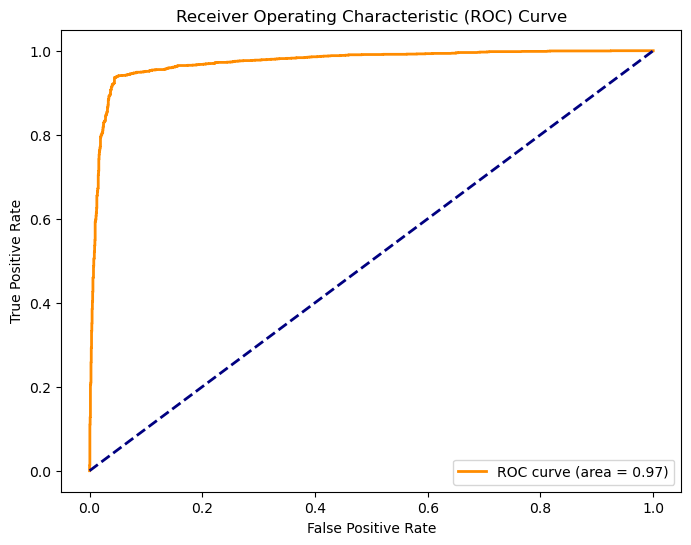

In [163]:
print("\nBone RF:")
validate_model(loaded_model_bone_rf, X_val_bone_scaled,y_val_bone_seer)


liver RF:

Val Accuracy: 0.9462864721485411
Val Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       794
           1       0.95      0.94      0.94       714

    accuracy                           0.95      1508
   macro avg       0.95      0.95      0.95      1508
weighted avg       0.95      0.95      0.95      1508



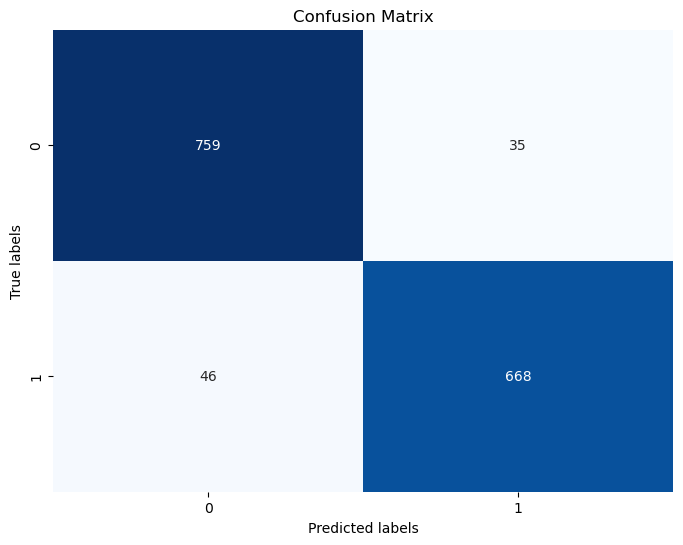

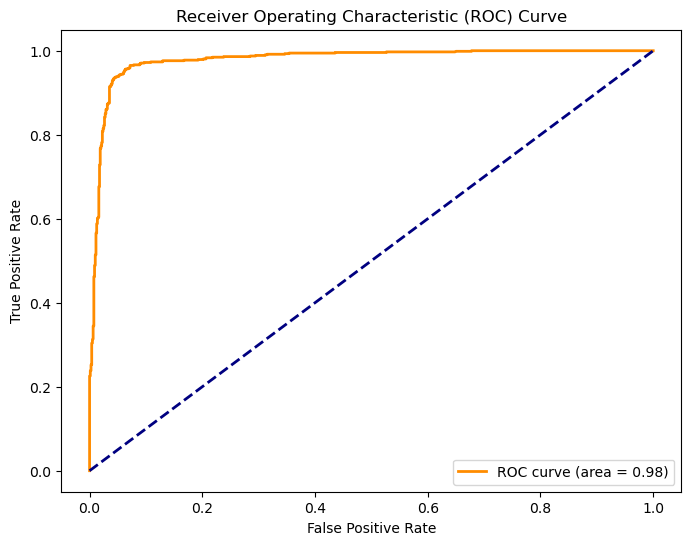

In [164]:
print("\nliver RF:")
validate_model(loaded_model_liver_rf, X_val_liver_scaled,y_val_liver_seer)


lung RF:

Val Accuracy: 0.9481185860889396
Val Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       928
           1       0.93      0.96      0.95       826

    accuracy                           0.95      1754
   macro avg       0.95      0.95      0.95      1754
weighted avg       0.95      0.95      0.95      1754



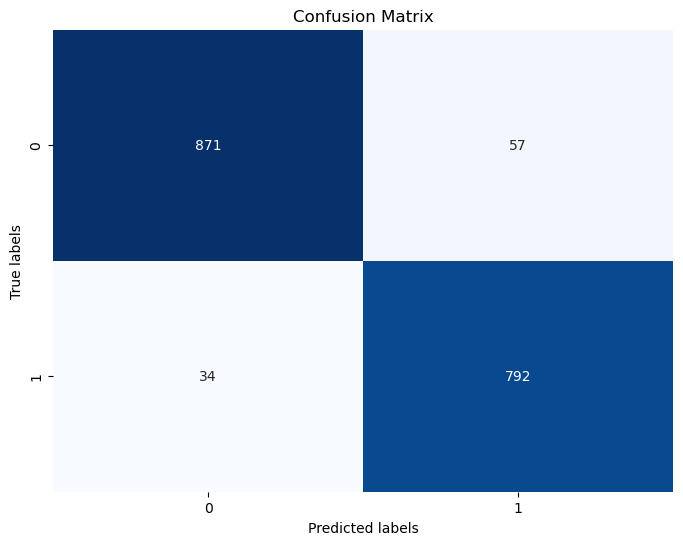

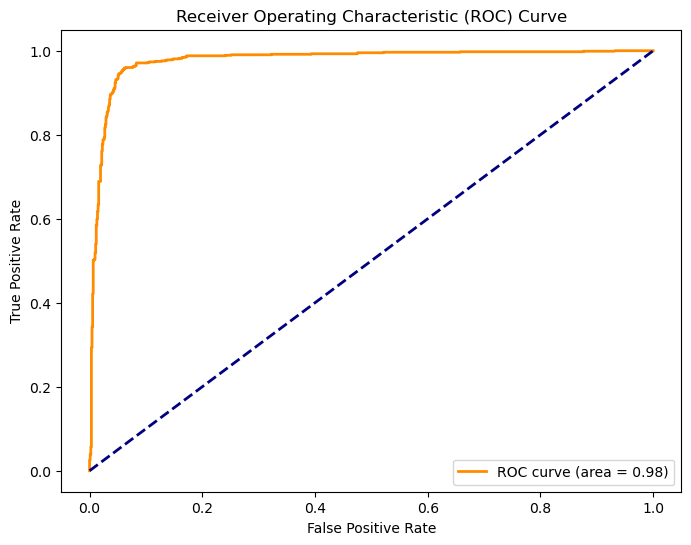

In [165]:
print("\nlung RF:")
validate_model(loaded_model_lung_rf, X_val_lung_scaled,y_val_lung_seer)


brain RF:

Val Accuracy: 0.9295039164490861
Val Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       202
           1       0.91      0.94      0.93       181

    accuracy                           0.93       383
   macro avg       0.93      0.93      0.93       383
weighted avg       0.93      0.93      0.93       383



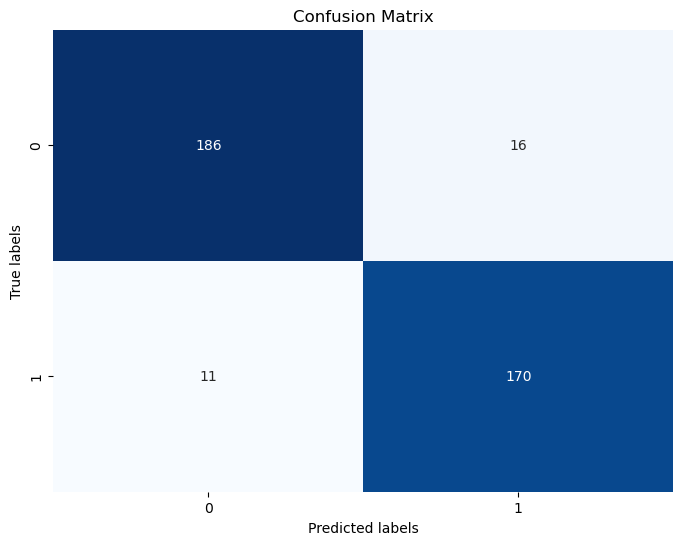

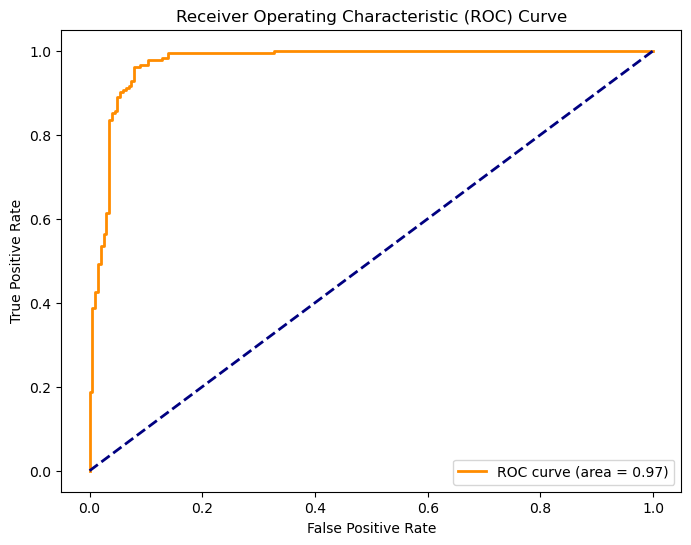

In [166]:
print("\nbrain RF:")
validate_model(loaded_model_brain_rf, X_val_brain_scaled,y_val_brain_seer)

## SVM


bone SVM:

Val Accuracy: 0.9452723535457348
Val Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2019
           1       0.95      0.93      0.94      1873

    accuracy                           0.95      3892
   macro avg       0.95      0.94      0.95      3892
weighted avg       0.95      0.95      0.95      3892



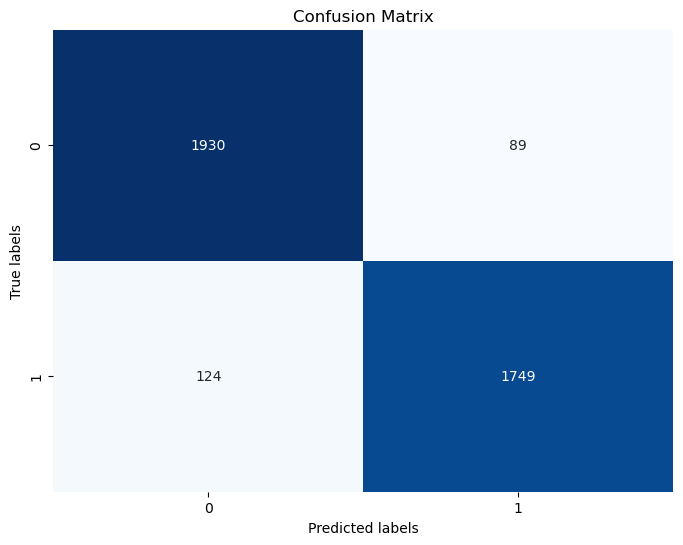

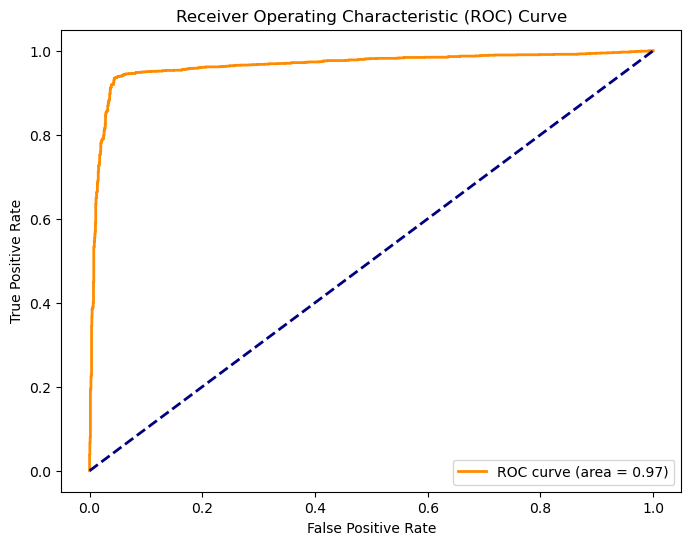

In [167]:
print("\nbone SVM:")
validate_model(loaded_model_bone_SV, X_val_bone_scaled,y_val_bone_seer)


liver SVM:

Val Accuracy: 0.9409814323607427
Val Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       794
           1       0.94      0.93      0.94       714

    accuracy                           0.94      1508
   macro avg       0.94      0.94      0.94      1508
weighted avg       0.94      0.94      0.94      1508



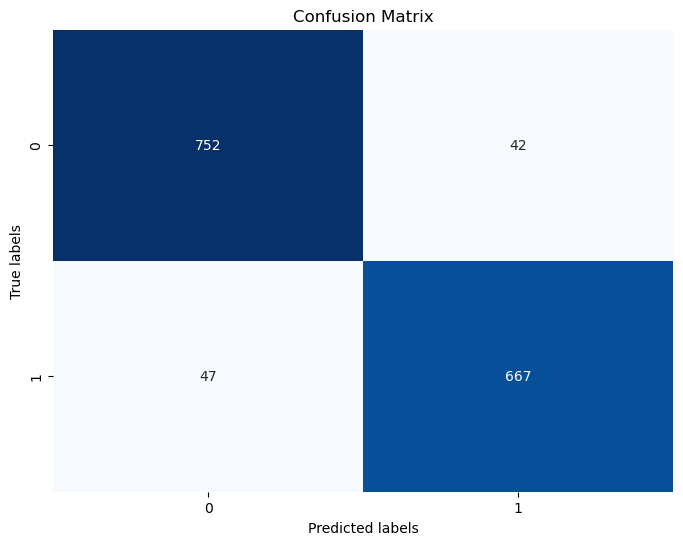

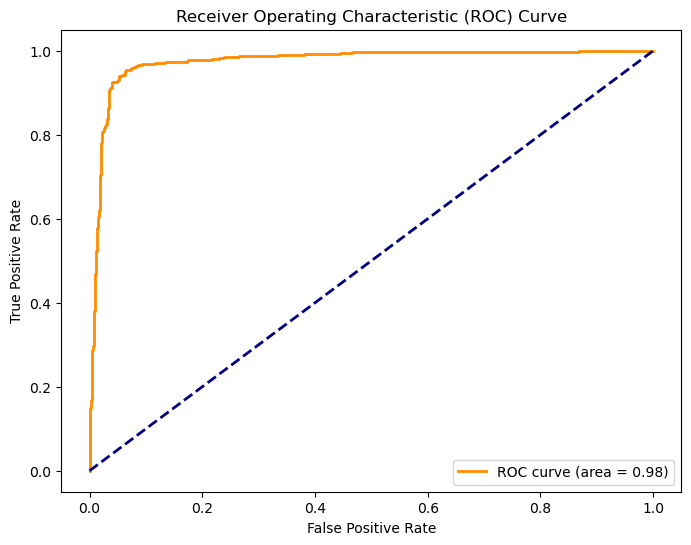

In [168]:
print("\nliver SVM:")
validate_model(loaded_model_liver_SV, X_val_liver_scaled,y_val_liver_seer)


lung SVM:

Val Accuracy: 0.942987457240593
Val Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       928
           1       0.93      0.95      0.94       826

    accuracy                           0.94      1754
   macro avg       0.94      0.94      0.94      1754
weighted avg       0.94      0.94      0.94      1754



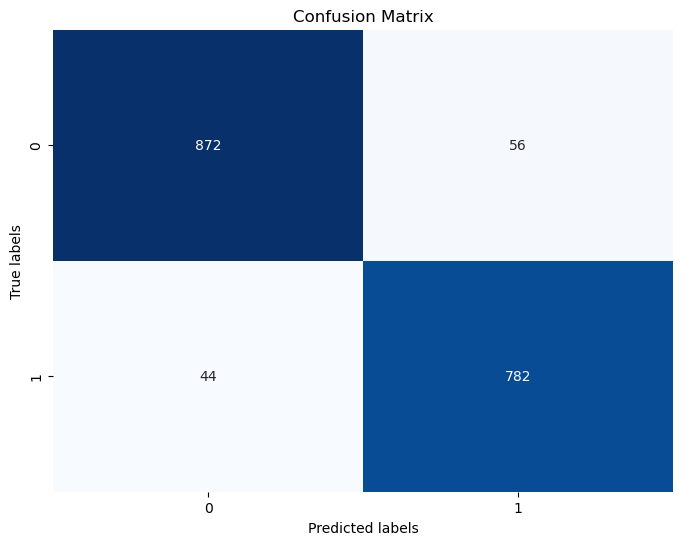

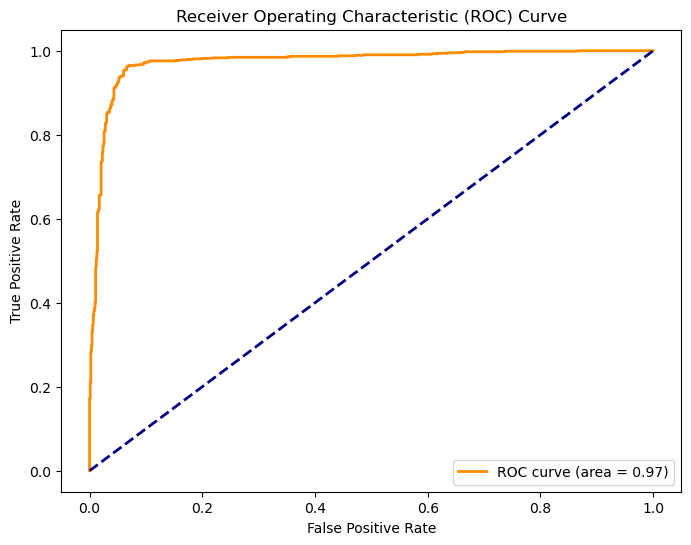

In [169]:
print("\nlung SVM:")
validate_model(loaded_model_lung_SV, X_val_lung_scaled,y_val_lung_seer)


brain SVM:

Val Accuracy: 0.9268929503916449
Val Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       202
           1       0.91      0.93      0.92       181

    accuracy                           0.93       383
   macro avg       0.93      0.93      0.93       383
weighted avg       0.93      0.93      0.93       383



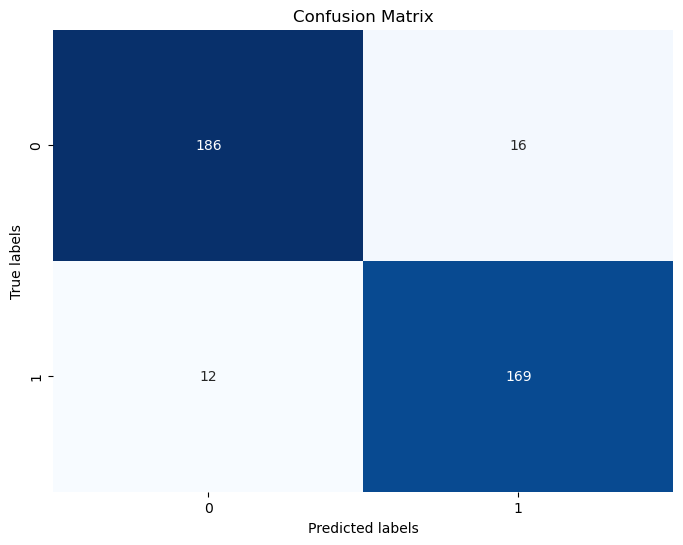

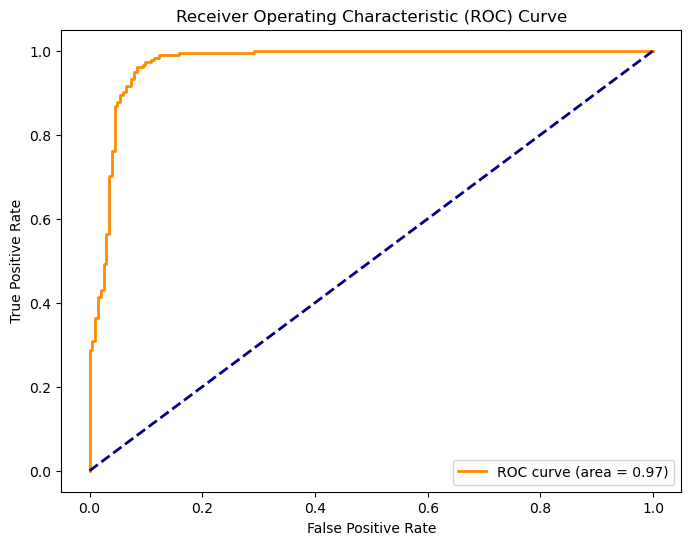

In [170]:
print("\nbrain SVM:")
validate_model(loaded_model_brain_SV, X_val_brain_scaled,y_val_brain_seer)

## **Benchmarking between models**
### **Combined ROC Curves**

In [171]:
# Evaluate models and plot combined ROC curves for each location
def plot_combined_roc_curves(models, X_tests, y_tests, labels):
    plt.figure(figsize=(10, 8))
    for model, X_test, y_test, label in zip(models, X_tests, y_tests, labels):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Combined ROC Curves')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

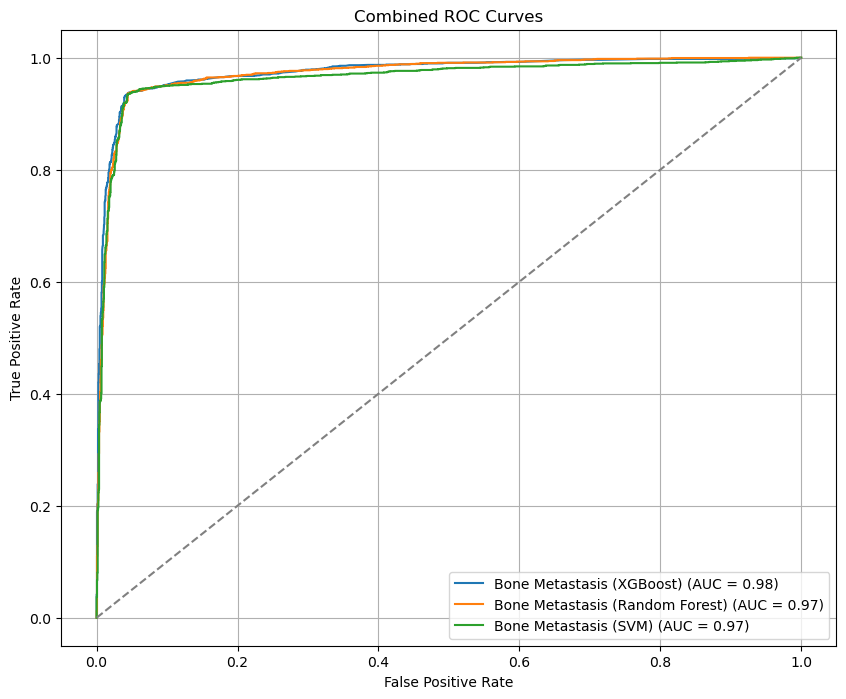

In [172]:
models_bone = [loaded_model_bone, loaded_model_bone_rf, loaded_model_bone_SV]
X_tests_bone = [X_val_bone_scaled, X_val_bone_scaled, X_val_bone_scaled]
y_tests_bone = [y_val_bone_seer, y_val_bone_seer, y_val_bone_seer]
labels_bone = ['Bone Metastasis (XGBoost)', 'Bone Metastasis (Random Forest)', 'Bone Metastasis (SVM)']

plot_combined_roc_curves(models_bone, X_tests_bone, y_tests_bone, labels_bone)

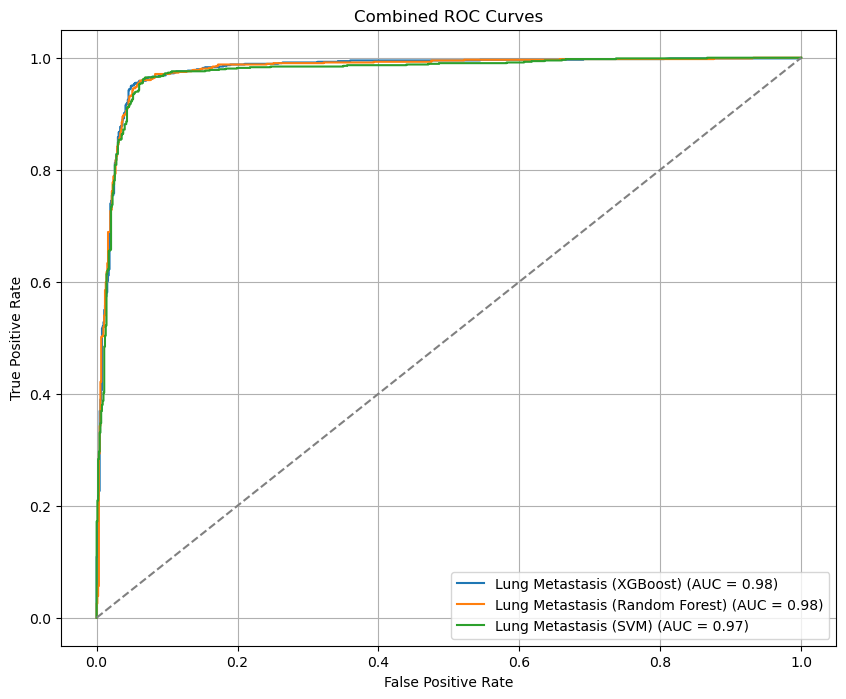

In [173]:
models_lung = [loaded_model_lung, loaded_model_lung_rf, loaded_model_lung_SV]
X_tests_lung = [X_val_lung_scaled, X_val_lung_scaled, X_val_lung_scaled]
y_tests_lung = [y_val_lung_seer, y_val_lung_seer, y_val_lung_seer]
labels_lung = ['Lung Metastasis (XGBoost)', 'Lung Metastasis (Random Forest)', 'Lung Metastasis (SVM)']

plot_combined_roc_curves(models_lung, X_tests_lung, y_tests_lung, labels_lung)

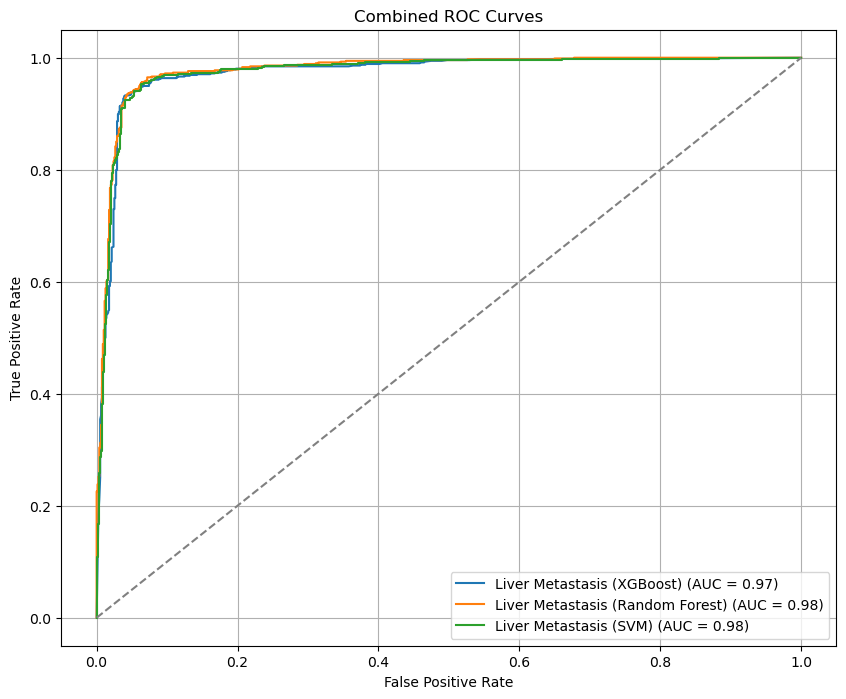

In [174]:
models_liver = [loaded_model_liver, loaded_model_liver_rf, loaded_model_liver_SV]
X_tests_liver = [X_val_liver_scaled, X_val_liver_scaled, X_val_liver_scaled]
y_tests_liver = [y_val_liver_seer, y_val_liver_seer, y_val_liver_seer]
labels_liver = ['Liver Metastasis (XGBoost)', 'Liver Metastasis (Random Forest)', 'Liver Metastasis (SVM)']

plot_combined_roc_curves(models_liver, X_tests_liver, y_tests_liver, labels_liver)

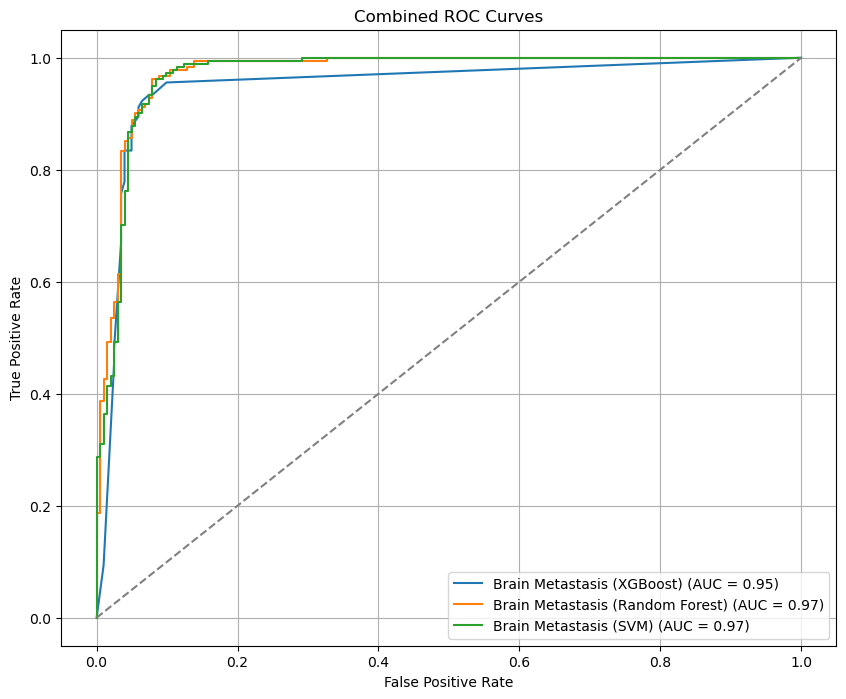

In [175]:
models_brain = [loaded_model_brain, loaded_model_brain_rf, loaded_model_brain_SV]
X_tests_brain = [X_val_brain_scaled, X_val_brain_scaled, X_val_brain_scaled]
y_tests_brain = [y_val_brain_seer, y_val_brain_seer, y_val_brain_seer]
labels_brain = ['Brain Metastasis (XGBoost)', 'Brain Metastasis (Random Forest)', 'Brain Metastasis (SVM)']

plot_combined_roc_curves(models_brain, X_tests_brain, y_tests_brain, labels_brain)

# **Baheya Validation**

In [211]:
Baheya_data = pd.read_csv('Distant_baheya.csv')
Baheya_data.head()

,Age,Menopausal Status,Tumor Size,Lymph Node Status,Tumor Location,Tumor Grade,Histological Type,ER,PR,HER2,...,Surgery,Chemotherapy,Radiotherapy,Recurrence_Type,Liver_metastasis,Lung_metastasis,Bone_metastasis,Brain_metastasis,Recurrence Free Status (Month),Overall Survival Status (Month)
0,35-39 years,Pre,T3,N3,Left,II,Infiltrating duct carcinoma,Positive,Negative,Negative,...,Yes,Yes,No,Distant,Yes,No,Yes,Yes,25.0,68.0
1,55-59 years,Post,T3,N2,Left,II,Infiltrating duct carcinoma,Positive,Positive,Negative,...,Yes,Yes,Yes,Distant,No,No,No,Yes,11.0,28.0
2,40-44 years,Pre,T2,N2,Right,II,Infiltrating duct carcinoma,Positive,Positive,Negative,...,Yes,Yes,Yes,Distant,No,Yes,Yes,Yes,89.0,98.0
3,30-34 years,Pre,T3,N2,Left,II,Infiltrating duct carcinoma,Positive,Positive,Negative,...,Yes,Yes,Yes,Distant,Yes,No,No,Yes,19.0,98.0
4,30-34 years,Pre,T3,N3,Right,II,Infiltrating duct carcinoma,Positive,Positive,Positive,...,Yes,Yes,Yes,Distant,Yes,Yes,Yes,Yes,6.0,51.0


In [212]:
Baheya_data = Baheya_data[ (Baheya_data['Histological Type'] != 'Invasive Breast Carcinoma')]

In [213]:
Baheya_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 0 to 253
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              248 non-null    object 
 1   Menopausal Status                248 non-null    object 
 2   Tumor Size                       248 non-null    object 
 3   Lymph Node Status                248 non-null    object 
 4   Tumor Location                   248 non-null    object 
 5   Tumor Grade                      248 non-null    object 
 6   Histological Type                248 non-null    object 
 7   ER                               248 non-null    object 
 8   PR                               248 non-null    object 
 9   HER2                             248 non-null    object 
 10  Mol Subtype                      248 non-null    object 
 11  Surgery                          248 non-null    object 
 12  Chemotherapy               

In [214]:
X_val_bone = Baheya_data.drop(columns=['Menopausal Status','Recurrence_Type','Recurrence Free Status (Month)','Brain_metastasis', 'Lung_metastasis', 'Liver_metastasis', 'Bone_metastasis'],axis=1)
y_val_bone = Baheya_data['Bone_metastasis']

In [215]:
X_val_bone = one_hot_encode_columns(X_val_bone, columns_to_encode)

In [216]:
# solve brain problem
size = X_val_bone.columns.get_loc('Tumor Size_T1')
X_val_bone.insert(size,'Tumor Size_T0', 0)

sur = X_val_bone.columns.get_loc('Surgery_Yes')
X_val_bone.insert(sur,'Surgery_No', 0)

histo1 = len(X_val_bone.columns)
X_val_bone.insert(histo1,'Histological Type_Mucinous adenocarcinoma', 0)

histo2 = X_val_bone.columns.get_loc('Histological Type_Infiltrating duct and lobular carcinoma')
X_val_bone.insert(histo2,'Histological Type_Cribriform carcinoma', 0)

histo3 = X_val_bone.columns.get_loc('Histological Type_Mucinous adenocarcinoma')
X_val_bone.insert(histo3,'Histological Type_Metaplastic carcinoma', 0)

In [217]:
X_val_bone_sca = X_val_bone.copy()
X_val_bone_sca['Overall Survival Status (Month)'] = scaler_bone.transform(X_val_bone_sca[['Overall Survival Status (Month)']])

In [218]:
y_val_bone = label_encoder_bone.transform(y_val_bone)

In [219]:
y_pred_val_bone = loaded_model_bone.predict(X_val_bone_sca)
val_acc = accuracy_score(y_val_bone, y_pred_val_bone)
val_report = classification_report(y_val_bone, y_pred_val_bone)
print("\nVal Accuracy:", val_acc)
print("Val Classification Report:")
print(val_report)


Val Accuracy: 0.6330645161290323
Val Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.17      0.24        82
           1       0.68      0.86      0.76       166

    accuracy                           0.63       248
   macro avg       0.53      0.52      0.50       248
weighted avg       0.58      0.63      0.59       248




Val Accuracy: 0.6330645161290323
Val Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.17      0.24        82
           1       0.68      0.86      0.76       166

    accuracy                           0.63       248
   macro avg       0.53      0.52      0.50       248
weighted avg       0.58      0.63      0.59       248



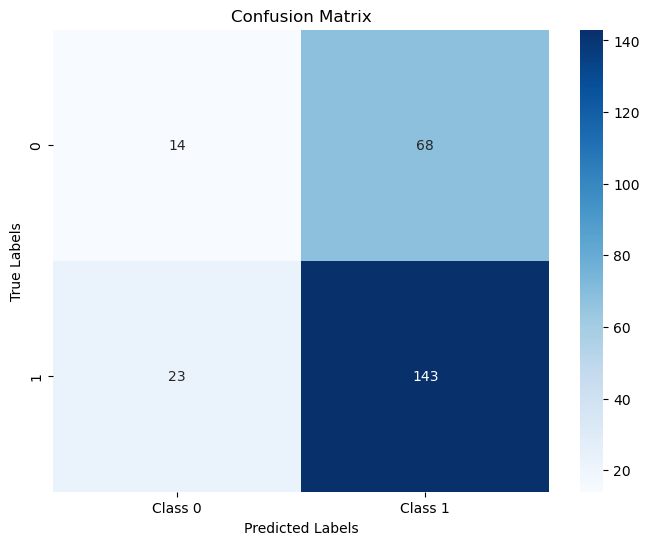

In [220]:
# Calculate accuracy and classification report
val_acc = accuracy_score(y_val_bone, y_pred_val_bone)
val_report = classification_report(y_val_bone, y_pred_val_bone)

# Print accuracy and classification report
print("\nVal Accuracy:", val_acc)
print("Val Classification Report:")
print(val_report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_val_bone, y_pred_val_bone)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
